# PISA Data Exploration
## by Ken Norton

PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. It is not a conventional school test. Rather than examining how well students have learned the school curriculum, it looks at how well prepared they are for life beyond school.

Around 510,000 students in 65 economies took part in the PISA 2012 assessment of reading, mathematics and science representing about 28 million 15-year-olds globally. Of those economies, 44 took part in an assessment of creative problem solving and 18 in an assessment of financial literacy.

My questions:

* Does the age when a child begins learning affect academic performance?
* How do political freedom and civil rights relate to academic performance?
* Does truancy affect academic performance? 

Other quaestions:

* How does the choice of school play into academic performance?
* Are there differences in achievement based on gender, location, or student attitudes?
* Are there differences in achievement based on teacher practices and attitudes?
* Does there exist inequality in academic achievement?
* Does access to the internet at school or at home relate to academic performance

## Preliminary Wrangling

## Load Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

# We have a lot of columns in our data set
pd.set_option('display.max_columns', 650)
pd.set_option('display.max_rows', 650)
pd.set_option('display.width', 1000)

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [3]:
# Using low_memory=False here to suppress the dtype errors
# per: https://stackoverflow.com/a/40585000
df = pd.read_csv('data/pisa2012.csv', low_memory=False, encoding='latin1')

In [4]:
# Import the freedom scores
df_free = pd.read_csv('data/Freedom_in_the_World_2012.csv')

## Assessment

In [5]:
# High level inspection
df.shape

(485490, 636)

In [6]:
df.sample(5)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST04Q01,ST05Q01,ST06Q01,ST07Q01,ST07Q02,ST07Q03,ST08Q01,ST09Q01,ST115Q01,ST11Q01,ST11Q02,ST11Q03,ST11Q04,ST11Q05,ST11Q06,ST13Q01,ST14Q01,ST14Q02,ST14Q03,ST14Q04,ST15Q01,ST17Q01,ST18Q01,ST18Q02,ST18Q03,ST18Q04,ST19Q01,ST20Q01,ST20Q02,ST20Q03,ST21Q01,ST25Q01,ST26Q01,ST26Q02,ST26Q03,ST26Q04,ST26Q05,ST26Q06,ST26Q07,ST26Q08,ST26Q09,ST26Q10,ST26Q11,ST26Q12,ST26Q13,ST26Q14,ST26Q15,ST26Q16,ST26Q17,ST27Q01,ST27Q02,ST27Q03,ST27Q04,ST27Q05,ST28Q01,ST29Q01,ST29Q02,ST29Q03,ST29Q04,ST29Q05,ST29Q06,ST29Q07,ST29Q08,ST35Q01,ST35Q02,ST35Q03,ST35Q04,ST35Q05,ST35Q06,ST37Q01,ST37Q02,ST37Q03,ST37Q04,ST37Q05,ST37Q06,ST37Q07,ST37Q08,ST42Q01,ST42Q02,ST42Q03,ST42Q04,ST42Q05,ST42Q06,ST42Q07,ST42Q08,ST42Q09,ST42Q10,ST43Q01,ST43Q02,ST43Q03,ST43Q04,ST43Q05,ST43Q06,ST44Q01,ST44Q03,ST44Q04,ST44Q05,ST44Q07,ST44Q08,ST46Q01,ST46Q02,ST46Q03,ST46Q04,ST46Q05,ST46Q06,ST46Q07,ST46Q08,ST46Q09,ST48Q01,ST48Q02,ST48Q03,ST48Q04,ST48Q05,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09,ST53Q01,ST53Q02,ST53Q03,ST53Q04,ST55Q01,ST55Q02,ST55Q03,ST55Q04,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST61Q01,ST61Q02,ST61Q03,ST61Q04,ST61Q05,ST61Q06,ST61Q07,ST61Q08,ST61Q09,ST62Q01,ST62Q02,ST62Q03,ST62Q04,ST62Q06,ST62Q07,ST62Q08,ST62Q09,ST62Q10,ST62Q11,ST62Q12,ST62Q13,ST62Q15,ST62Q16,ST62Q17,ST62Q19,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST73Q01,ST73Q02,ST74Q01,ST74Q02,ST75Q01,ST75Q02,ST76Q01,ST76Q02,ST77Q01,ST77Q02,ST77Q04,ST77Q05,ST77Q06,ST79Q01,ST79Q02,ST79Q03,ST79Q04,ST79Q05,ST79Q06,ST79Q07,ST79Q08,ST79Q10,ST79Q11,ST79Q12,ST79Q15,ST79Q17,ST80Q01,ST80Q04,ST80Q05,ST80Q06,ST80Q07,ST80Q08,ST80Q09,ST80Q10,ST80Q11,ST81Q01,ST81Q02,ST81Q03,ST81Q04,ST81Q05,ST82Q01,ST82Q02,ST82Q03,ST83Q01,ST83Q02,ST83Q03,ST83Q04,ST84Q01,ST84Q02,ST84Q03,ST85Q01,ST85Q02,ST85Q03,ST85Q04,ST86Q01,ST86Q02,ST86Q03,ST86Q04,ST86Q05,ST87Q01,ST87Q02,ST87Q03,ST87Q04,ST87Q05,ST87Q06,ST87Q07,ST87Q08,ST87Q09,ST88Q01,ST88Q02,ST88Q03,ST88Q04,ST89Q02,ST89Q03,ST89Q04,ST89Q05,ST91Q01,ST91Q02,ST91Q03,ST91Q04,ST91Q05,ST91Q06,ST93Q01,ST93Q03,ST93Q04,ST93Q06,ST93Q07,ST94Q05,ST94Q06,ST94Q09,ST94Q10,ST94Q14,ST96Q01,ST96Q02,ST96Q03,ST96Q05,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC01Q01,IC01Q02,IC01Q03,IC01Q04,IC01Q05,IC01Q06,IC01Q07,IC01Q08,IC01Q09,IC01Q10,IC01Q11,IC02Q01,IC02Q02,IC02Q03,IC02Q04,IC02Q05,IC02Q06,IC02Q07,IC03Q01,IC04Q01,IC05Q01,IC06Q01,IC07Q01,IC08Q01,IC08Q02,IC08Q03,IC08Q04,IC08Q05,IC08Q06,IC08Q07,IC08Q08,IC08Q09,IC08Q11,IC09Q01,IC09Q02,IC09Q03,IC09Q04,IC09Q05,IC09Q06,IC09Q07,IC10Q01,IC10Q02,IC10Q03,IC10Q04,IC10Q05,IC10Q06,IC10Q07,IC10Q08,IC10Q09,IC11Q01,IC11Q02,IC11Q03,IC11Q04,IC11Q05,IC11Q06,IC11Q07,IC22Q01,IC22Q02,IC22Q04,IC22Q06,IC22Q07,IC22Q08,EC01Q01,EC02Q01,EC03Q01,EC03Q02,EC03Q03,EC03Q04,EC03Q05,EC03Q06,EC03Q07,EC03Q08,EC03Q09,EC03Q10,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,EC05Q01,EC06Q01,EC07Q01,EC07Q02,EC07Q03,EC07Q04,EC07Q05,EC08Q01,EC08Q02,EC08Q03,EC08Q04,EC09Q03,EC10Q01,EC11Q02,EC11Q03,EC12Q01,ST22Q01,ST23Q01,ST23Q02,ST23Q03,ST23Q04,ST23Q05,ST23Q06,ST23Q07,ST23Q08,ST24Q01,ST24Q02,ST24Q03,CLCUSE1,CLCUSE301,CLCUSE302,DEFFORT,QUESTID,BOOKID,EASY,AGE,GRADE,PROGN,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COBN_F,COBN_M,COBN_S,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,FISCED,HEDRES,HERITCUL,HISCED,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,IMMIG,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,ISCEDD,ISCEDL,ISCEDO,LANGCOMM,LANGN,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MISCED,MMINS,MTSUP,OCOD1,OCOD2,OPENPS,OUTHOURS,PARED,PERSEV,REPEAT,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TESTLANG,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUD

In [7]:
df.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,ST21Q01,ST26Q15,ST26Q16,ST26Q17,ST57Q01,ST57Q02,ST57Q03,ST57Q04,ST57Q05,ST57Q06,ST69Q01,ST69Q02,ST69Q03,ST70Q01,ST70Q02,ST70Q03,ST71Q01,ST72Q01,ST101Q01,ST101Q02,ST101Q03,ST101Q05,ST104Q01,ST104Q04,ST104Q05,ST104Q06,IC05Q01,IC06Q01,IC07Q01,EC04Q01A,EC04Q01B,EC04Q01C,EC04Q02A,EC04Q02B,EC04Q02C,EC04Q03A,EC04Q03B,EC04Q03C,EC04Q04A,EC04Q04B,EC04Q04C,EC04Q05A,EC04Q05B,EC04Q05C,EC04Q06A,EC04Q06B,EC04Q06C,CLCUSE301,CLCUSE302,DEFFORT,AGE,GRADE,ANXMAT,ATSCHL,ATTLNACT,BELONG,BFMJ2,BMMJ1,CLSMAN,COGACT,CULTDIST,CULTPOS,DISCLIMA,ENTUSE,ESCS,EXAPPLM,EXPUREM,FAILMAT,FAMCON,FAMCONC,FAMSTRUC,HEDRES,HERITCUL,HISEI,HOMEPOS,HOMSCH,HOSTCUL,ICTATTNEG,ICTATTPOS,ICTHOME,ICTRES,ICTSCH,INFOCAR,INFOJOB1,INFOJOB2,INSTMOT,INTMAT,LANGCOMM,LANGRPPD,LMINS,MATBEH,MATHEFF,MATINTFC,MATWKETH,MMINS,MTSUP,OPENPS,OUTHOURS,PARED,PERSEV,SCMAT,SMINS,STUDREL,SUBNORM,TCHBEHFA,TCHBEHSO,TCHBEHTD,TEACHSUP,TIMEINT,USEMATH,USESCH,WEALTH,ANCATSCHL,ANCATTLNACT,ANCBELONG,ANCCLSMAN,ANCCOGACT,ANCINSTMOT,ANCINTMAT,ANCMATWKETH,ANCMTSUP,ANCSCMAT,ANCSTUDREL,ANCSUBNORM,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH,PV1MACC,PV2MACC,PV3MACC,PV4MACC,PV5MACC,PV1MACQ,PV2MACQ,PV3MACQ,PV4MACQ,PV5MACQ,PV1MACS,PV2MACS,PV3MACS,PV4MACS,PV5MACS,PV1MACU,PV2MACU,PV3MACU,PV4MACU,PV5MACU,PV1MAPE,PV2MAPE,PV3MAPE,PV4MAPE,PV5MAPE,PV1MAPF,PV2MAPF,PV3MAPF,PV4MAPF,PV5MAPF,PV1MAPI,PV2MAPI,PV3MAPI,PV4MAPI,PV5MAPI,PV1READ,PV2READ,PV3READ,PV4READ,PV5READ,PV1SCIE,PV2SCIE,PV3SCIE,PV4SCIE,PV5SCIE,W_FSTUWT,W_FSTR1,W_FSTR2,W_FSTR3,W_FSTR4,W_FSTR5,W_FSTR6,W_FSTR7,W_FSTR8,W_FSTR9,W_FSTR10,W_FSTR11,W_FSTR12,W_FSTR13,W_FSTR14,W_FSTR15,W_FSTR16,W_FSTR17,W_FSTR18,W_FSTR19,W_FSTR20,W_FSTR21,W_FSTR22,W_FSTR23,W_FSTR24,W_FSTR25,W_FSTR26,W_FSTR27,W_FSTR28,W_FSTR29,W_FSTR30,W_FSTR31,W_FSTR32,W_FSTR33,W_FSTR34,W_FSTR35,W_FSTR36,W_FSTR37,W_FSTR38,W_FSTR39,W_FSTR40,W_FSTR41,W_FSTR42,W_FSTR43,W_FSTR44,W_FSTR45,W_FSTR46,W_FSTR47,W_FSTR48,W_FSTR49,W_FSTR50,W_FSTR51,W_FSTR52,W_FSTR53,W_FSTR54,W_FSTR55,W_FSTR56,W_FSTR57,W_FSTR58,W_FSTR59,W_FSTR60,W_FSTR61,W_FSTR62,W_FSTR63,W_FSTR64,W_FSTR65,W_FSTR66,W_FSTR67,W_FSTR68,W_FSTR69,W_FSTR70,W_FSTR71,W_FSTR72,W_FSTR73,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,32728.000000,4.854900e+05,4.854900e+05,4.854900e+05,301367.000000,269808.000000,283813.000000,279657.000000,289502.000000,289428.000000,299618.000000,298601.000000,291943.000000,296878.000000,298339.000000,289068.000000,255665.000000,294163.000000,311290.000000,310906.000000,310321.00000,310655.000000,310449.000000,309969.000000,310366.000000,310156.000000,485490.000000,485490.000000,485490.000000,169730.000000,169765.000000,169779.000000,169783.000000,169784.000000,169798.000000,169796.000000,169786.000000,169799.000000,169655.000000,169641.00000,169656.000000,169716.000000,169716.000000,169725.000000,169643.000000,169640.000000,169636.000000,485490.000000,485490.000000,485490.000000,485374.000000,484617.000000,314764.000000,312584.000000,311675.000000,313399.000000,416150.000000,364814.000000,312708.000000,314557.000000,13380.000000,471357.000000,314777.000000,295195.000000,473648.000000,313279.000000,312602.000000,314448.000000,310304.000000,308442.000000,429058.000000,477772.000000,13496.000000,450621.000000,479807.000000,293194.000000,13598.000000,289744.000000,290490.000000,298740.000000,477754.000000,297995.000000,165792.000000,83305.000000,83305.000000,316322.000000,316708.000000,44094.000000,43137.000000,282866.000000,313847.000000,315948.000000,301360.000000,314501.000000,283303.000000,313599.000000,312766.000000,308799.000000,473091.000000,313172.000000,314607.000000,270914.000000,313860.000000,316323.000000,314678.000000,315114.000000,315519.000000,316371.000000,297074.000000,290260.000000,292585.000000,479597.00000,306835.000000,306487.000000,307640.000

## Cleaning

In [8]:
# Make a copy for cleaning
df_clean = df.copy()

I noticed several of the text values have leading or trailing spaces.

In [9]:
# Trim trailing/leading spaces
df_clean = df_clean.apply(lambda x: x.str.strip()
                          if x.dtype == "object" else x)

In [10]:
# Join the Freedom House data, drop the dupe country column
df_clean = pd.merge(df_clean, df_free, left_on='NC', right_on='country')
df_clean.drop(columns=['country'], inplace=True)

In [11]:
# Test to make sure join worked
df_clean.freedom_status.unique()

array(['PF', 'NF', 'F'], dtype=object)

In [12]:
# Convert the freedom_status field to an ordered dtype
ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=['NF', 'PF', 'F'])

df_clean['freedom_status'] = df_clean['freedom_status'].astype(ordered_var)


### Overall Math/Reading/Science Scores

From the [PISA Data Visualization Contest instructions](https://www.oecd.org/pisa/pisaproducts/datavisualizationcontest.htm): "Pupil performance in mathematics, reading and science is coded by plausible values. You can find them in columns: PV1MATH-PV5MATH (for math), PV1READ-PV5READ (for reading) and PV1SCIE-PV5SCIE (for science). For given area all five values PV1-PV5 are just independent estimations of the student performance in given area. For exploration it is fine to use only PV1."

Based on this, I've decided to use the average of each of the five scores in each category as an overall "literacy" value.

In [13]:
# Average of the five math assessment scores
# Each score is scaled to a mean of 500 and a standard deviation of 100
df_clean['math_literacy'] = ((df_clean['PV1MATH'] + df_clean['PV2MATH'] +
                             df_clean['PV3MATH'] + df_clean['PV4MATH'] +
                             df_clean['PV5MATH']) / 5)

# Average of the five reading assessment scores
# Each score is scaled to a mean of 500 and a standard deviation of 100
df_clean['read_literacy'] = ((df_clean['PV1READ'] + df_clean['PV2READ'] +
                             df_clean['PV3READ'] + df_clean['PV4READ'] +
                             df_clean['PV5READ']) / 5)

# Average of the five science assessment scores
# Each score is scaled to a mean of 500 and a standard deviation of 100
df_clean['sci_literacy'] = ((df_clean['PV1SCIE'] + df_clean['PV2SCIE'] +
                             df_clean['PV3SCIE'] + df_clean['PV4SCIE'] +
                             df_clean['PV5SCIE']) / 5)

### Age Started Learning

In [14]:
# EC06Q01 = age started learning
df_clean.EC06Q01.unique()

array([nan, '0 to 3 years', '4 to 6 years', '10 to 12 years',
       '7 to 9 years', '13 years or older'], dtype=object)

In [15]:
# Convert the EC06Q01 field to an ordered dtype
ordered_var = pd.api.types.CategoricalDtype(ordered=True,
                                            categories=[
                                                '0 to 3 years', 
                                                '4 to 6 years',
                                                '7 to 9 years',
                                                '10 to 12 years',
                                                '13 years or older'
                                            ])

df_clean['EC06Q01'] = df_clean['EC06Q01'].astype(ordered_var)


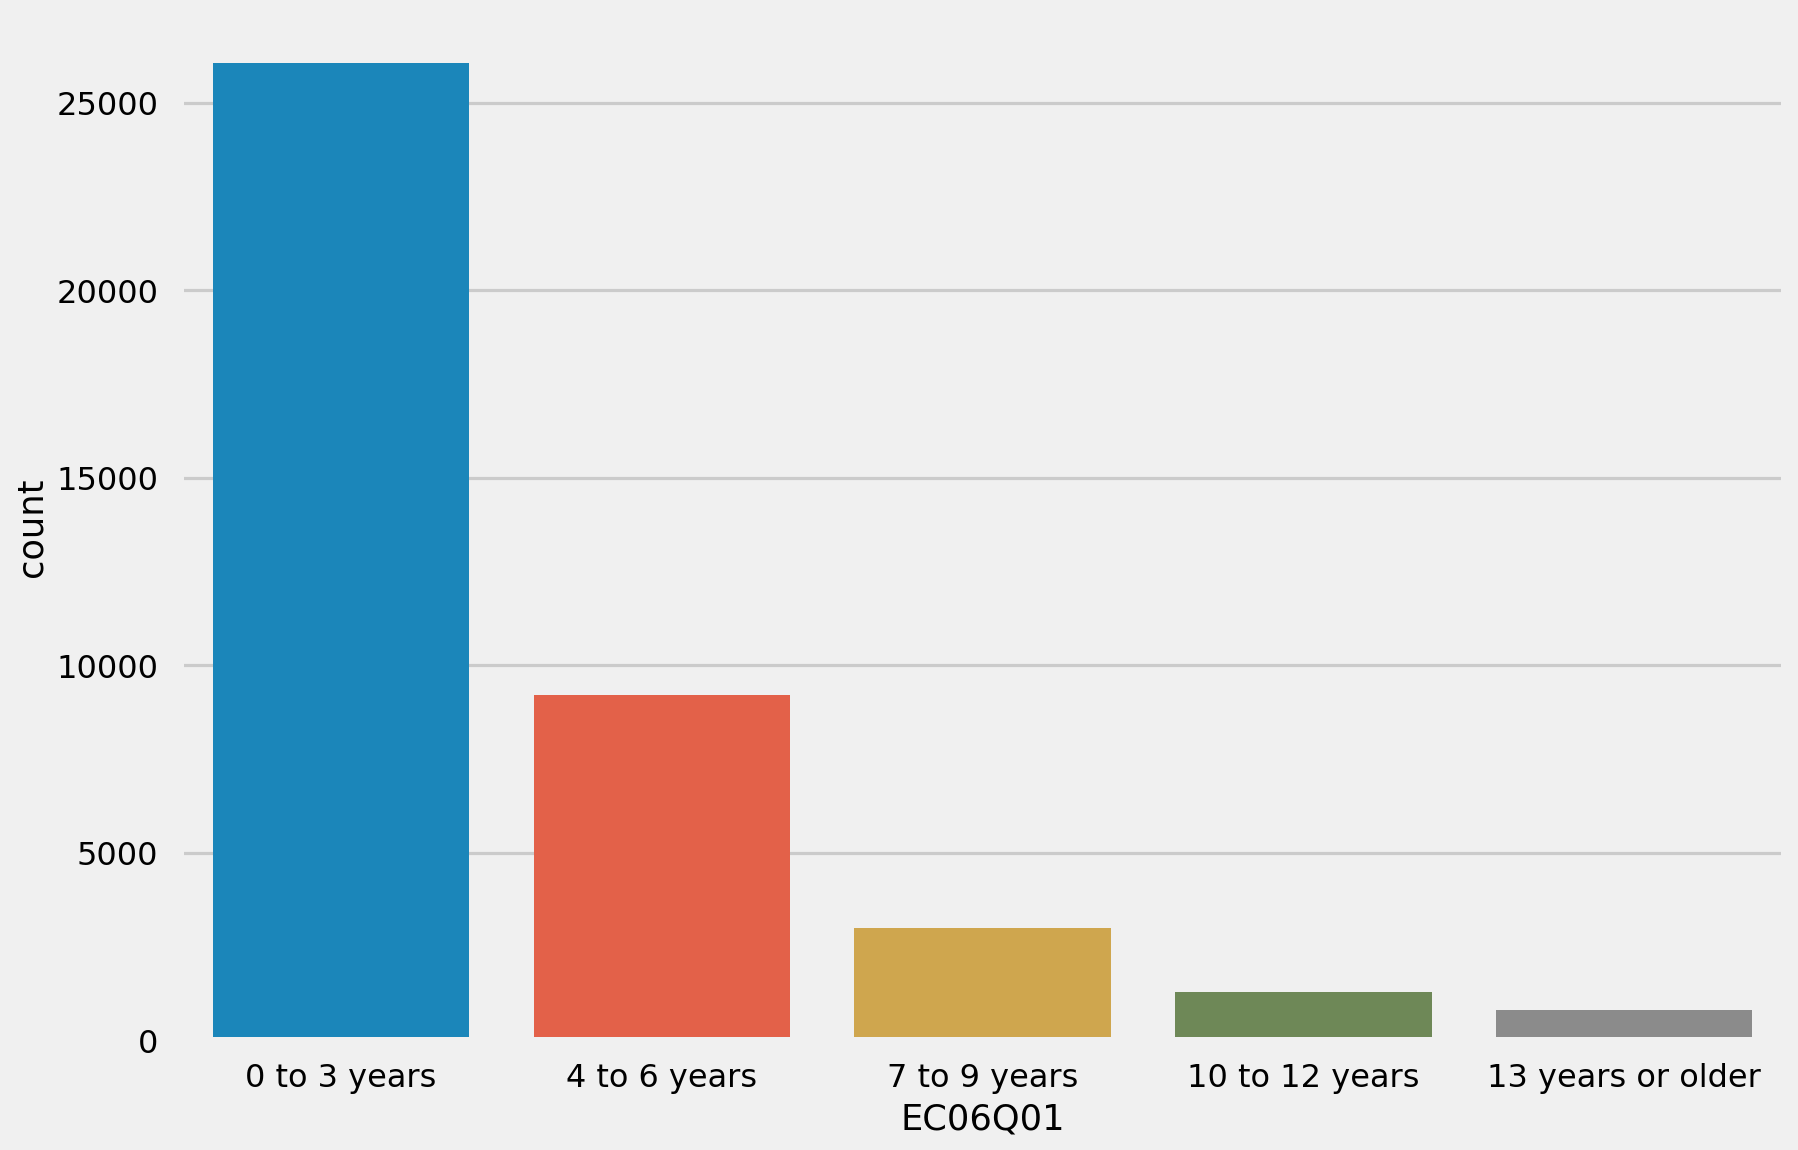

In [16]:
# EC06Q01 = age started learning
sns.countplot(data=df_clean, x='EC06Q01')
plt.show()

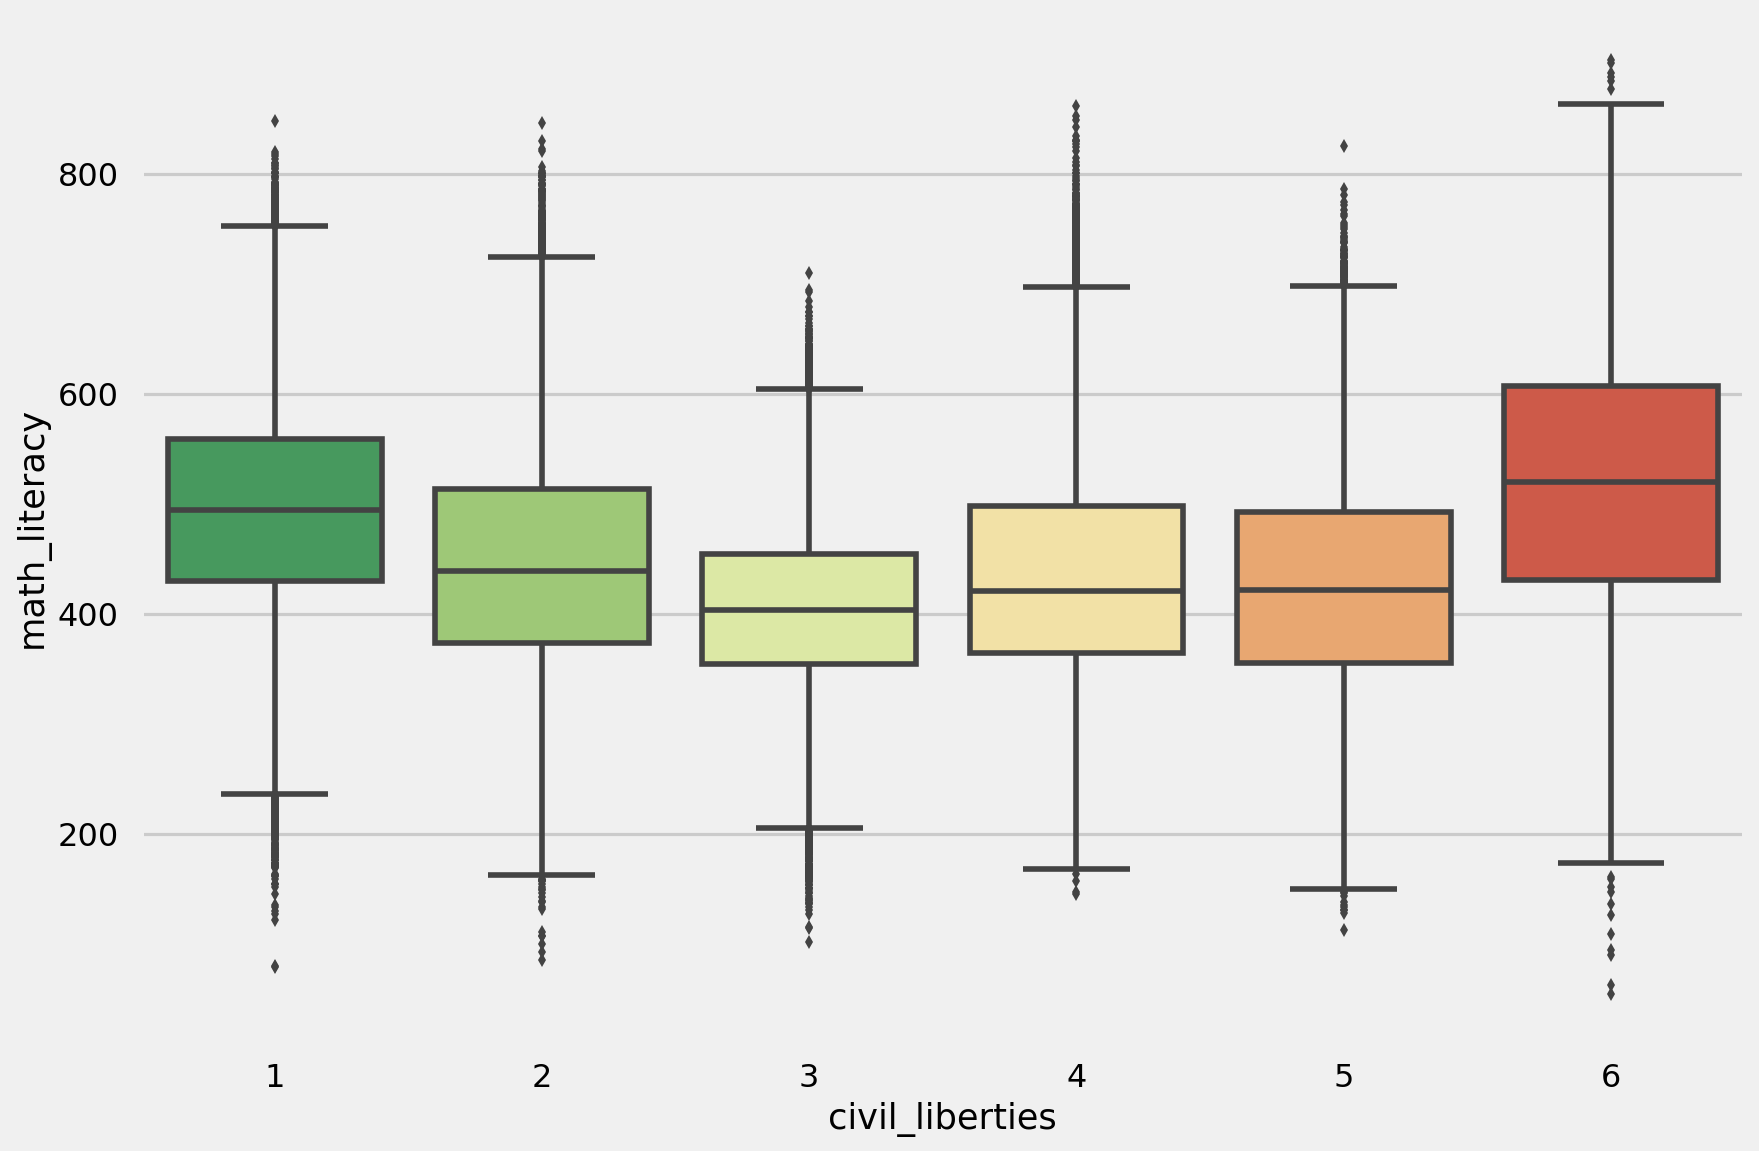

In [17]:
sns.boxplot(data=df_clean,
            x='civil_liberties',
            y='math_literacy',
            palette='RdYlGn_r')
plt.show()


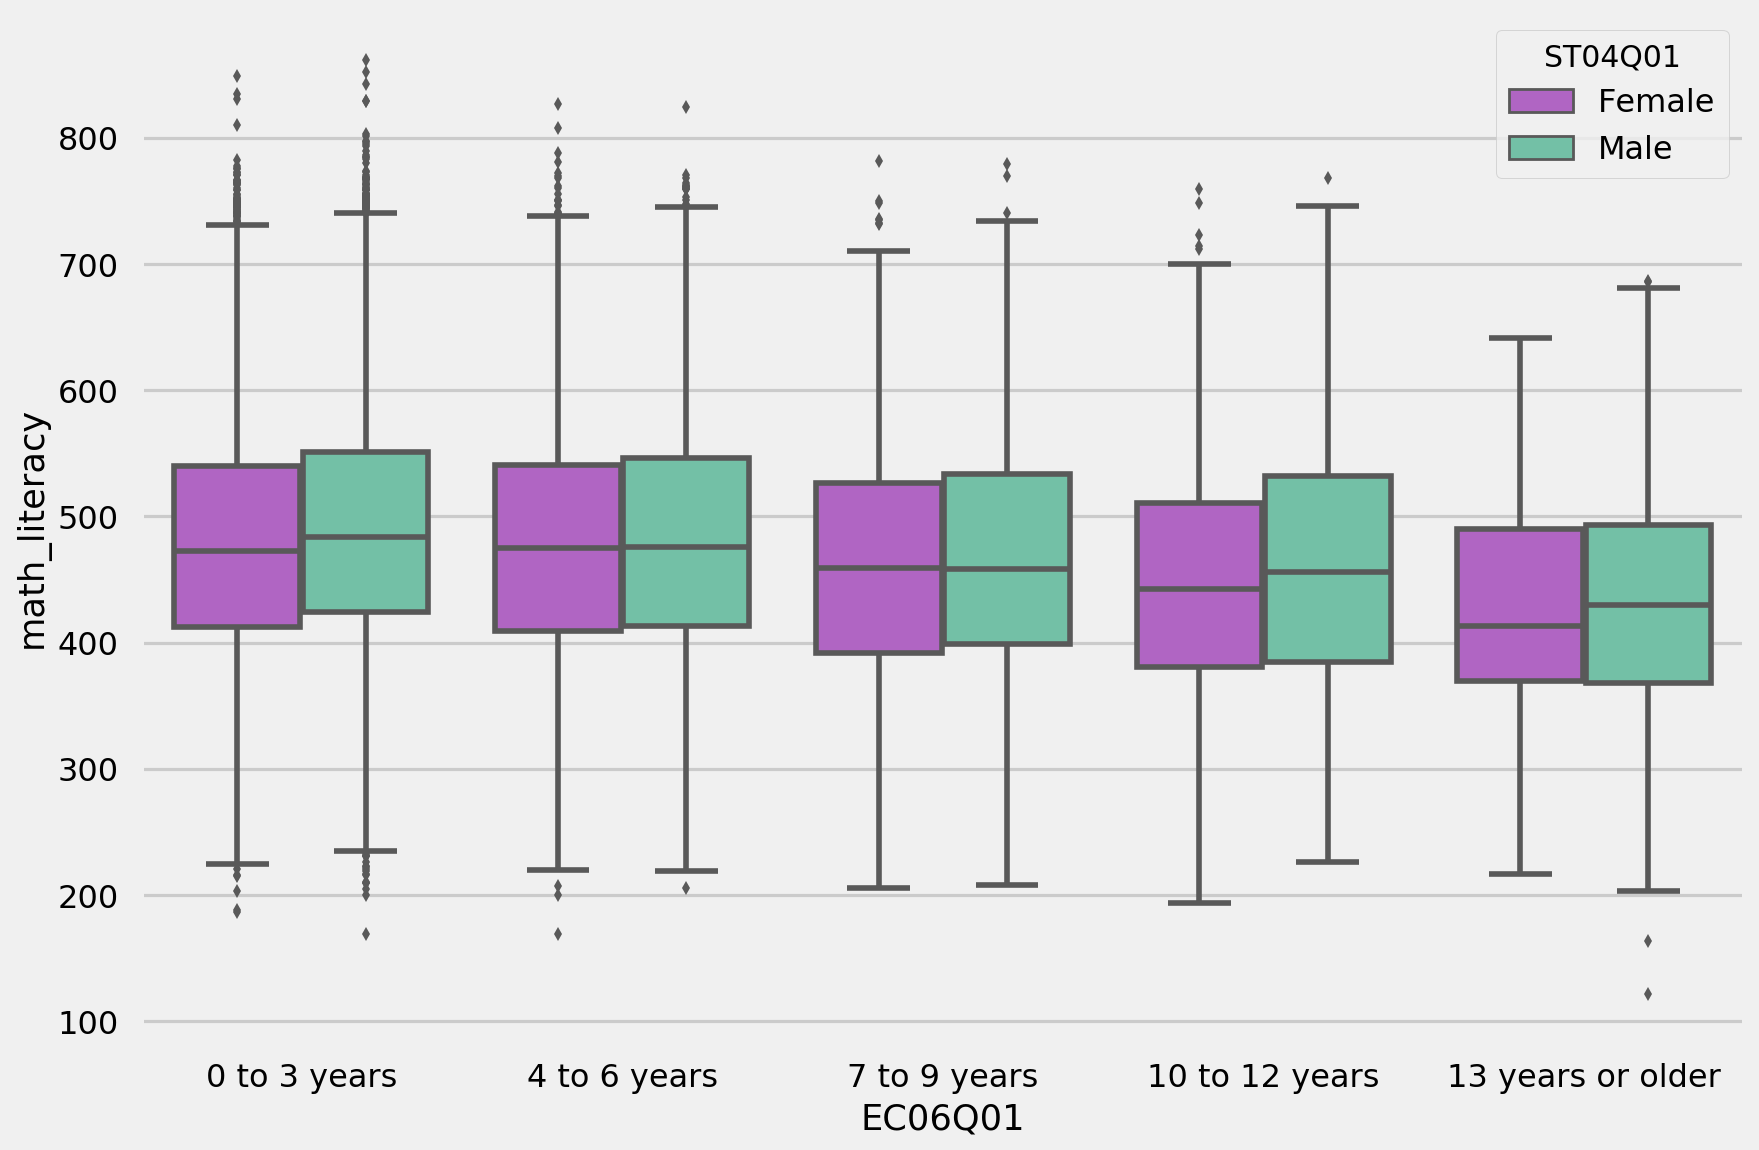

In [18]:
sns.boxplot(data=df_clean,
            x='EC06Q01',
            y='math_literacy',
            palette=['mediumorchid', 'mediumaquamarine'],
            hue='ST04Q01')
plt.show()


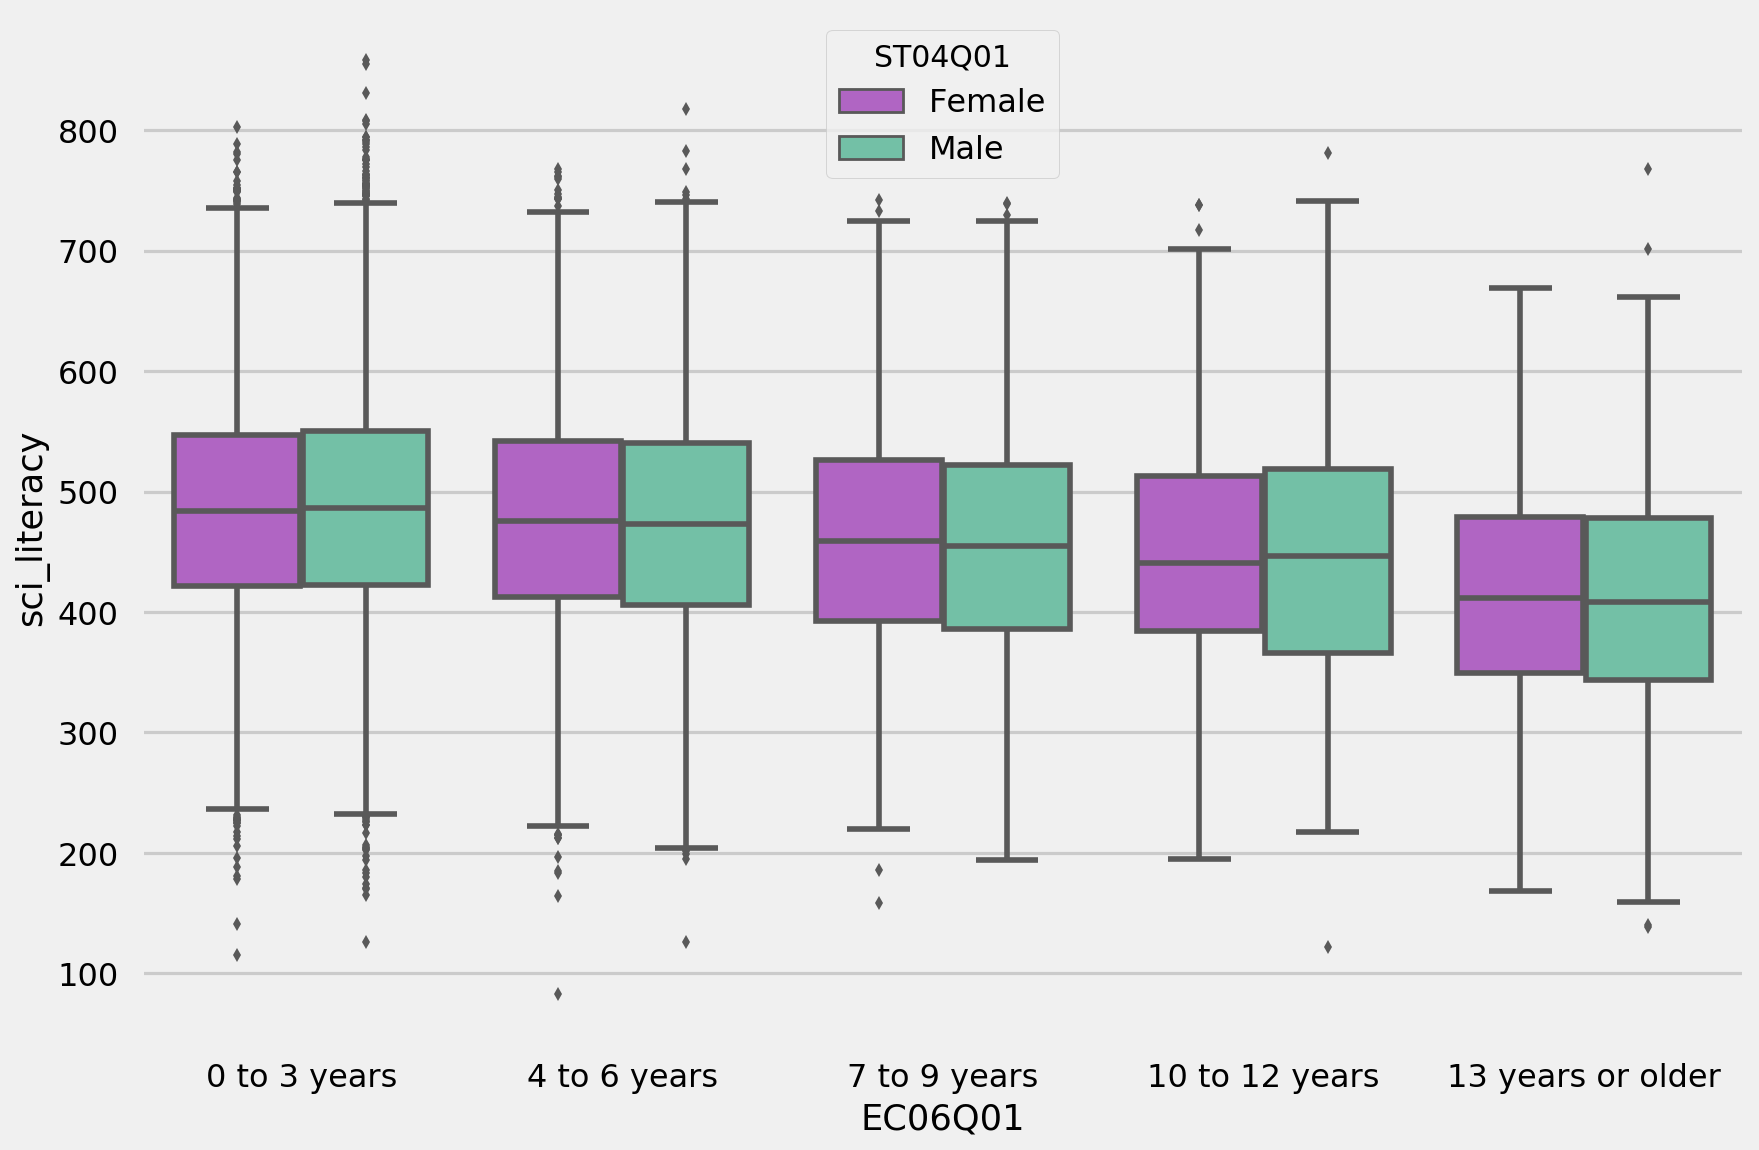

In [19]:
sns.boxplot(data=df_clean,
            x='EC06Q01',
            y='sci_literacy',
            palette=['mediumorchid', 'mediumaquamarine'],
            hue='ST04Q01')
plt.show()


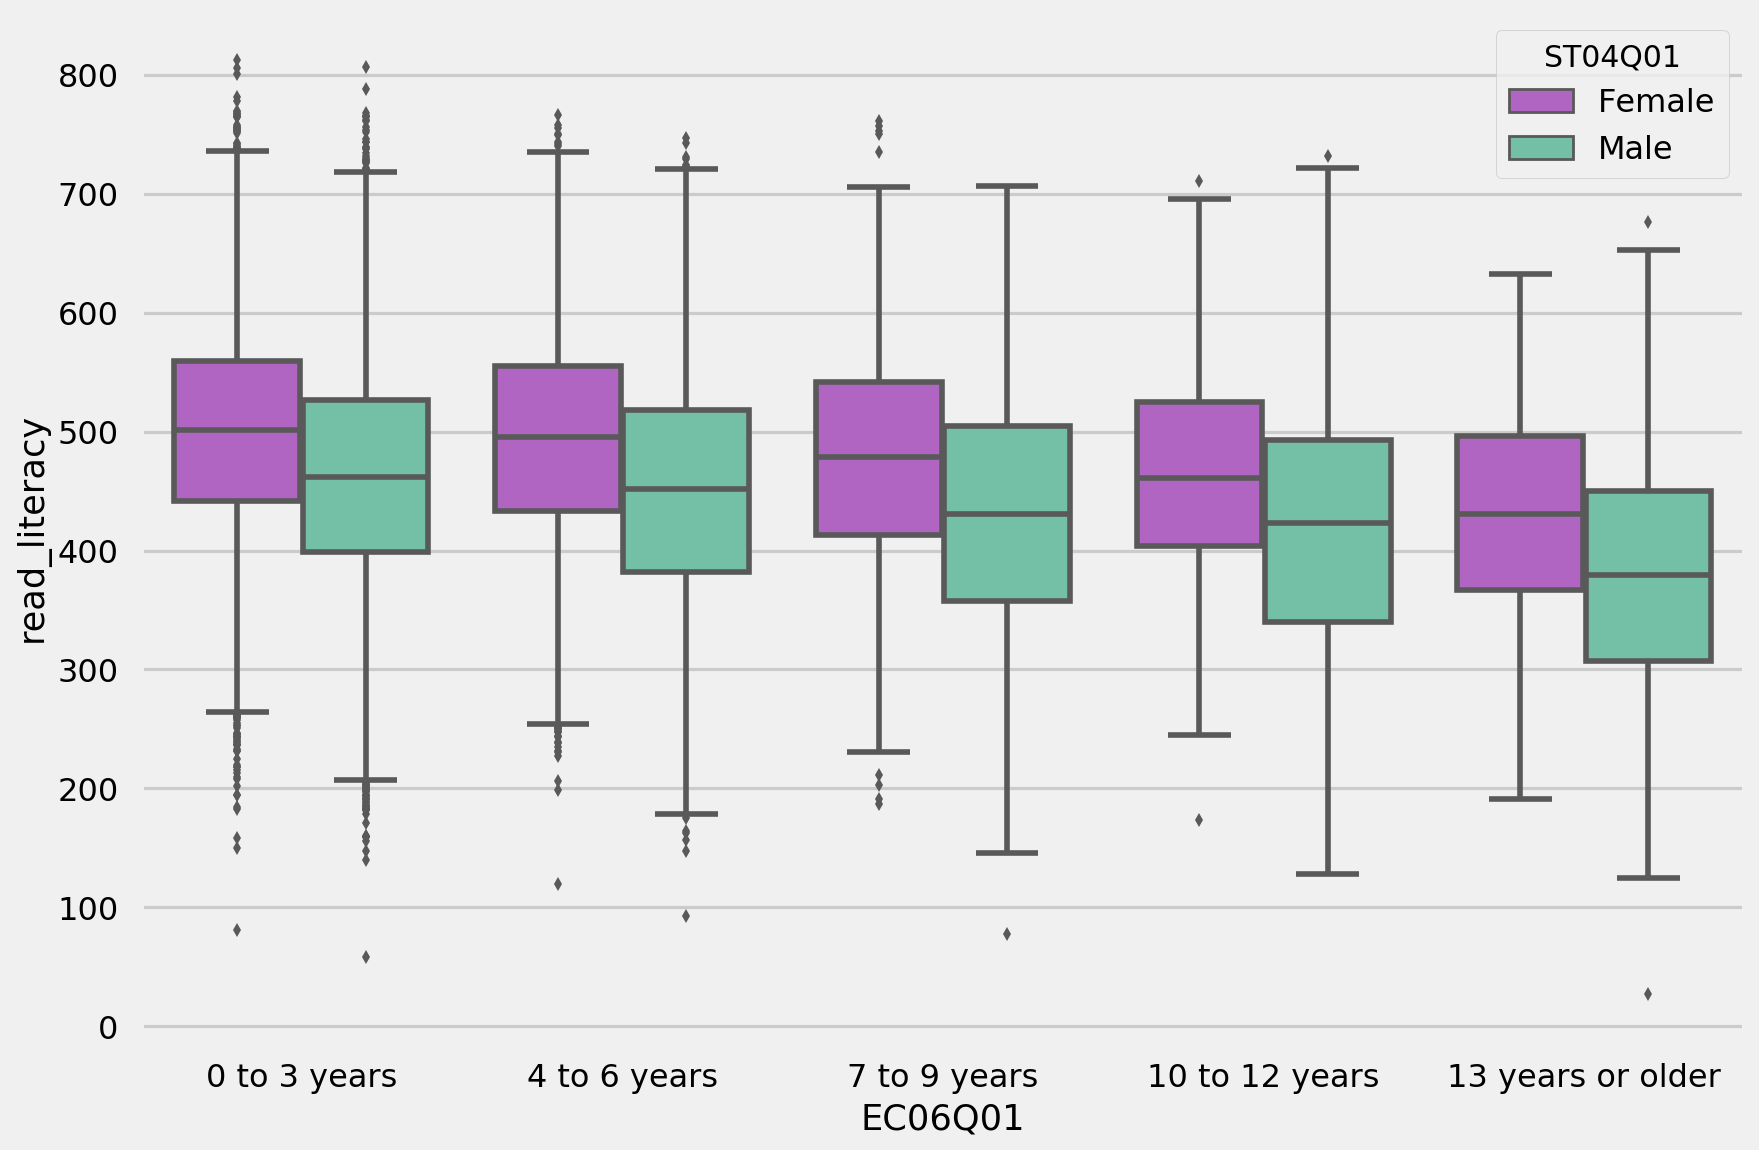

In [20]:
sns.boxplot(data=df_clean,
            x='EC06Q01',
            y='read_literacy',
            palette=['mediumorchid', 'mediumaquamarine'],
            hue='ST04Q01')
plt.show()


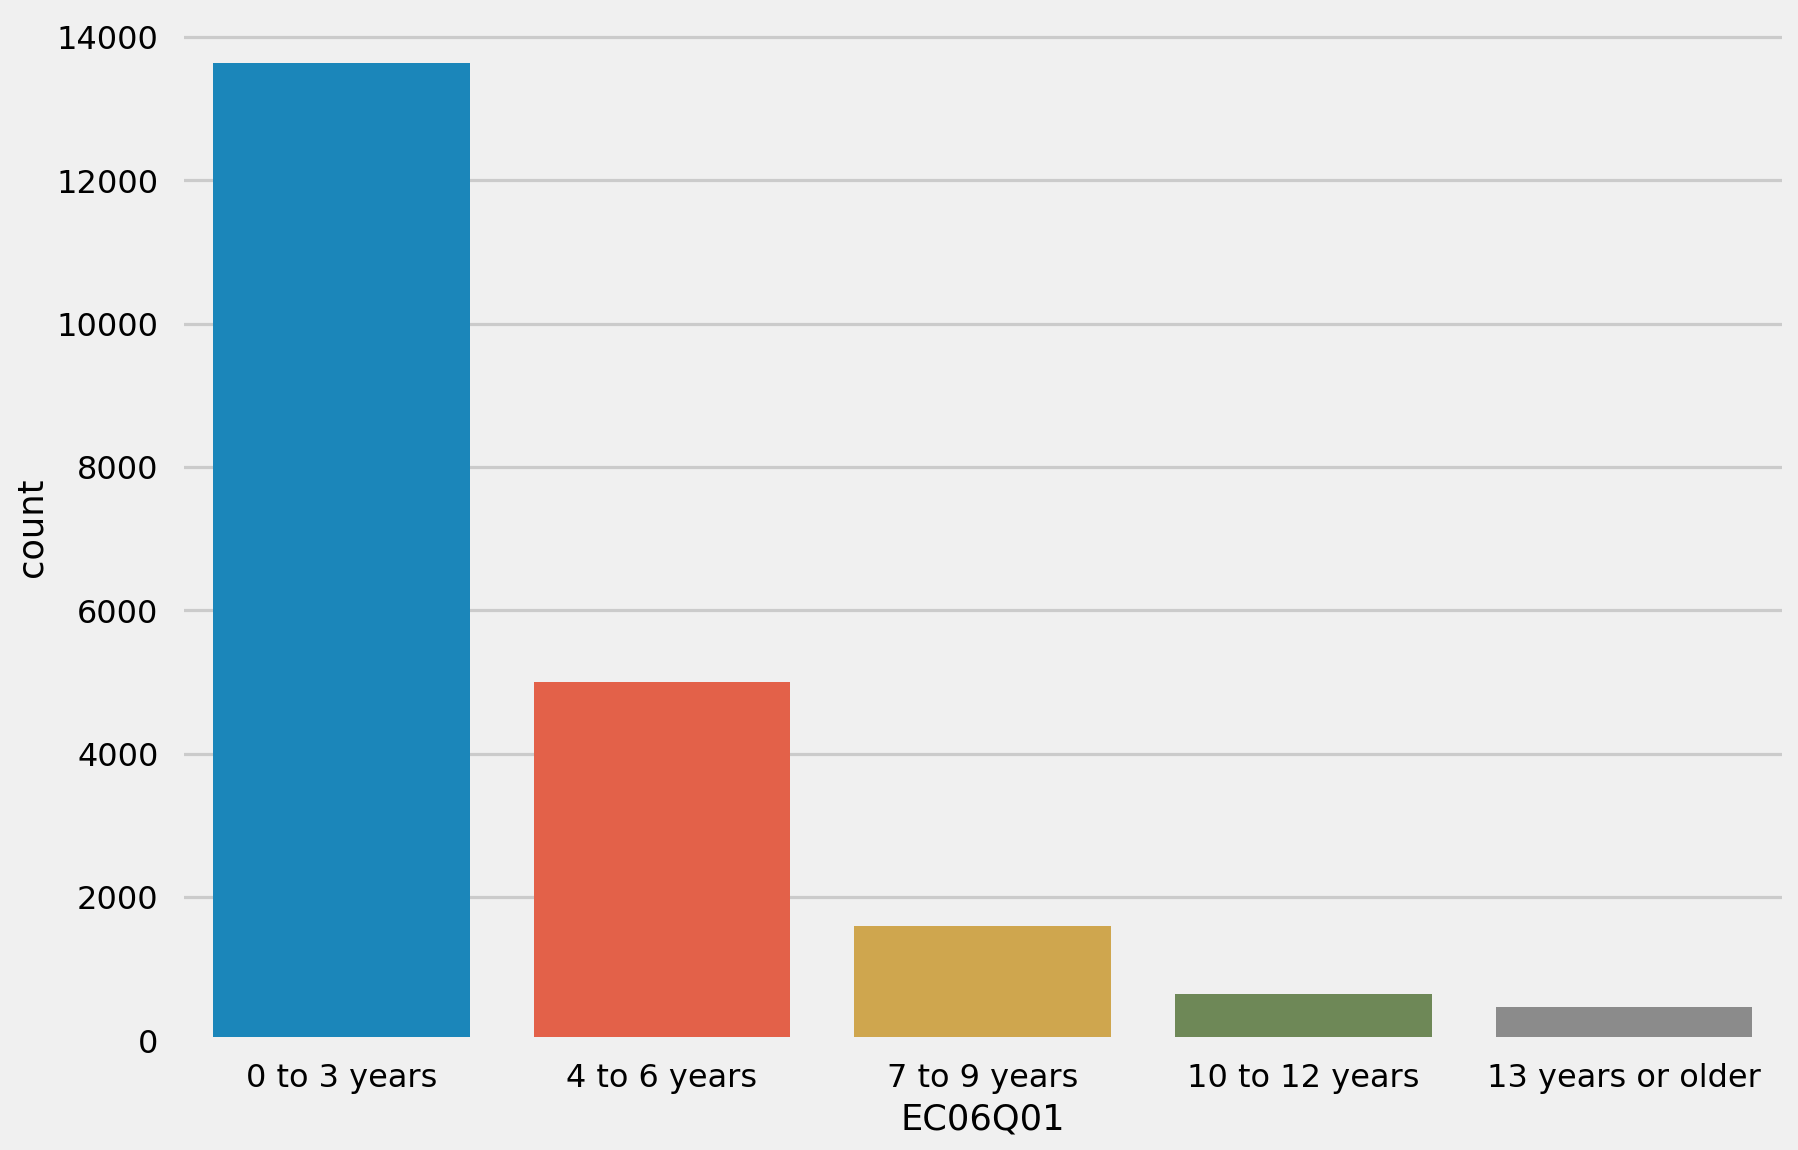

In [21]:
sns.countplot(data=df_clean.query('ST04Q01 == "Male"'), x='EC06Q01')
plt.show()

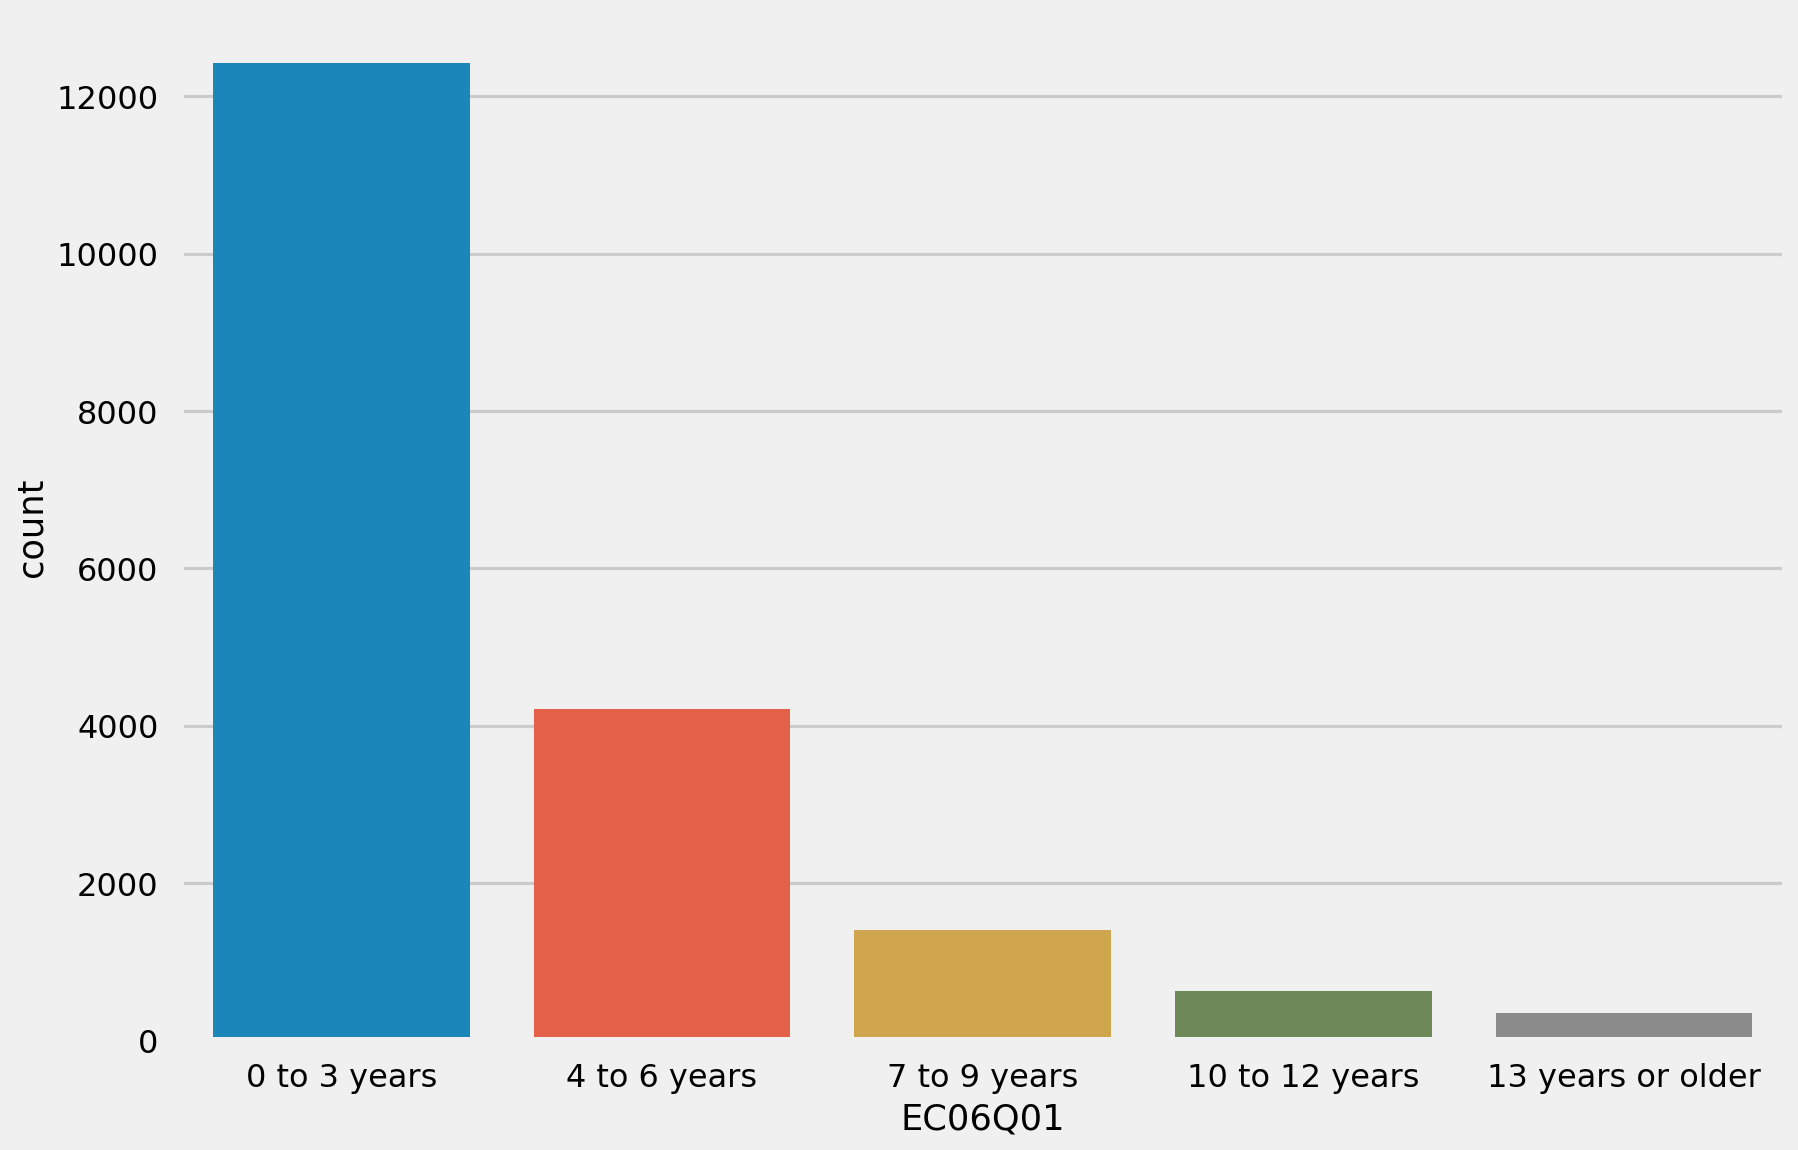

In [22]:
sns.countplot(data=df_clean.query('ST04Q01 == "Female"'), x='EC06Q01')
plt.show()


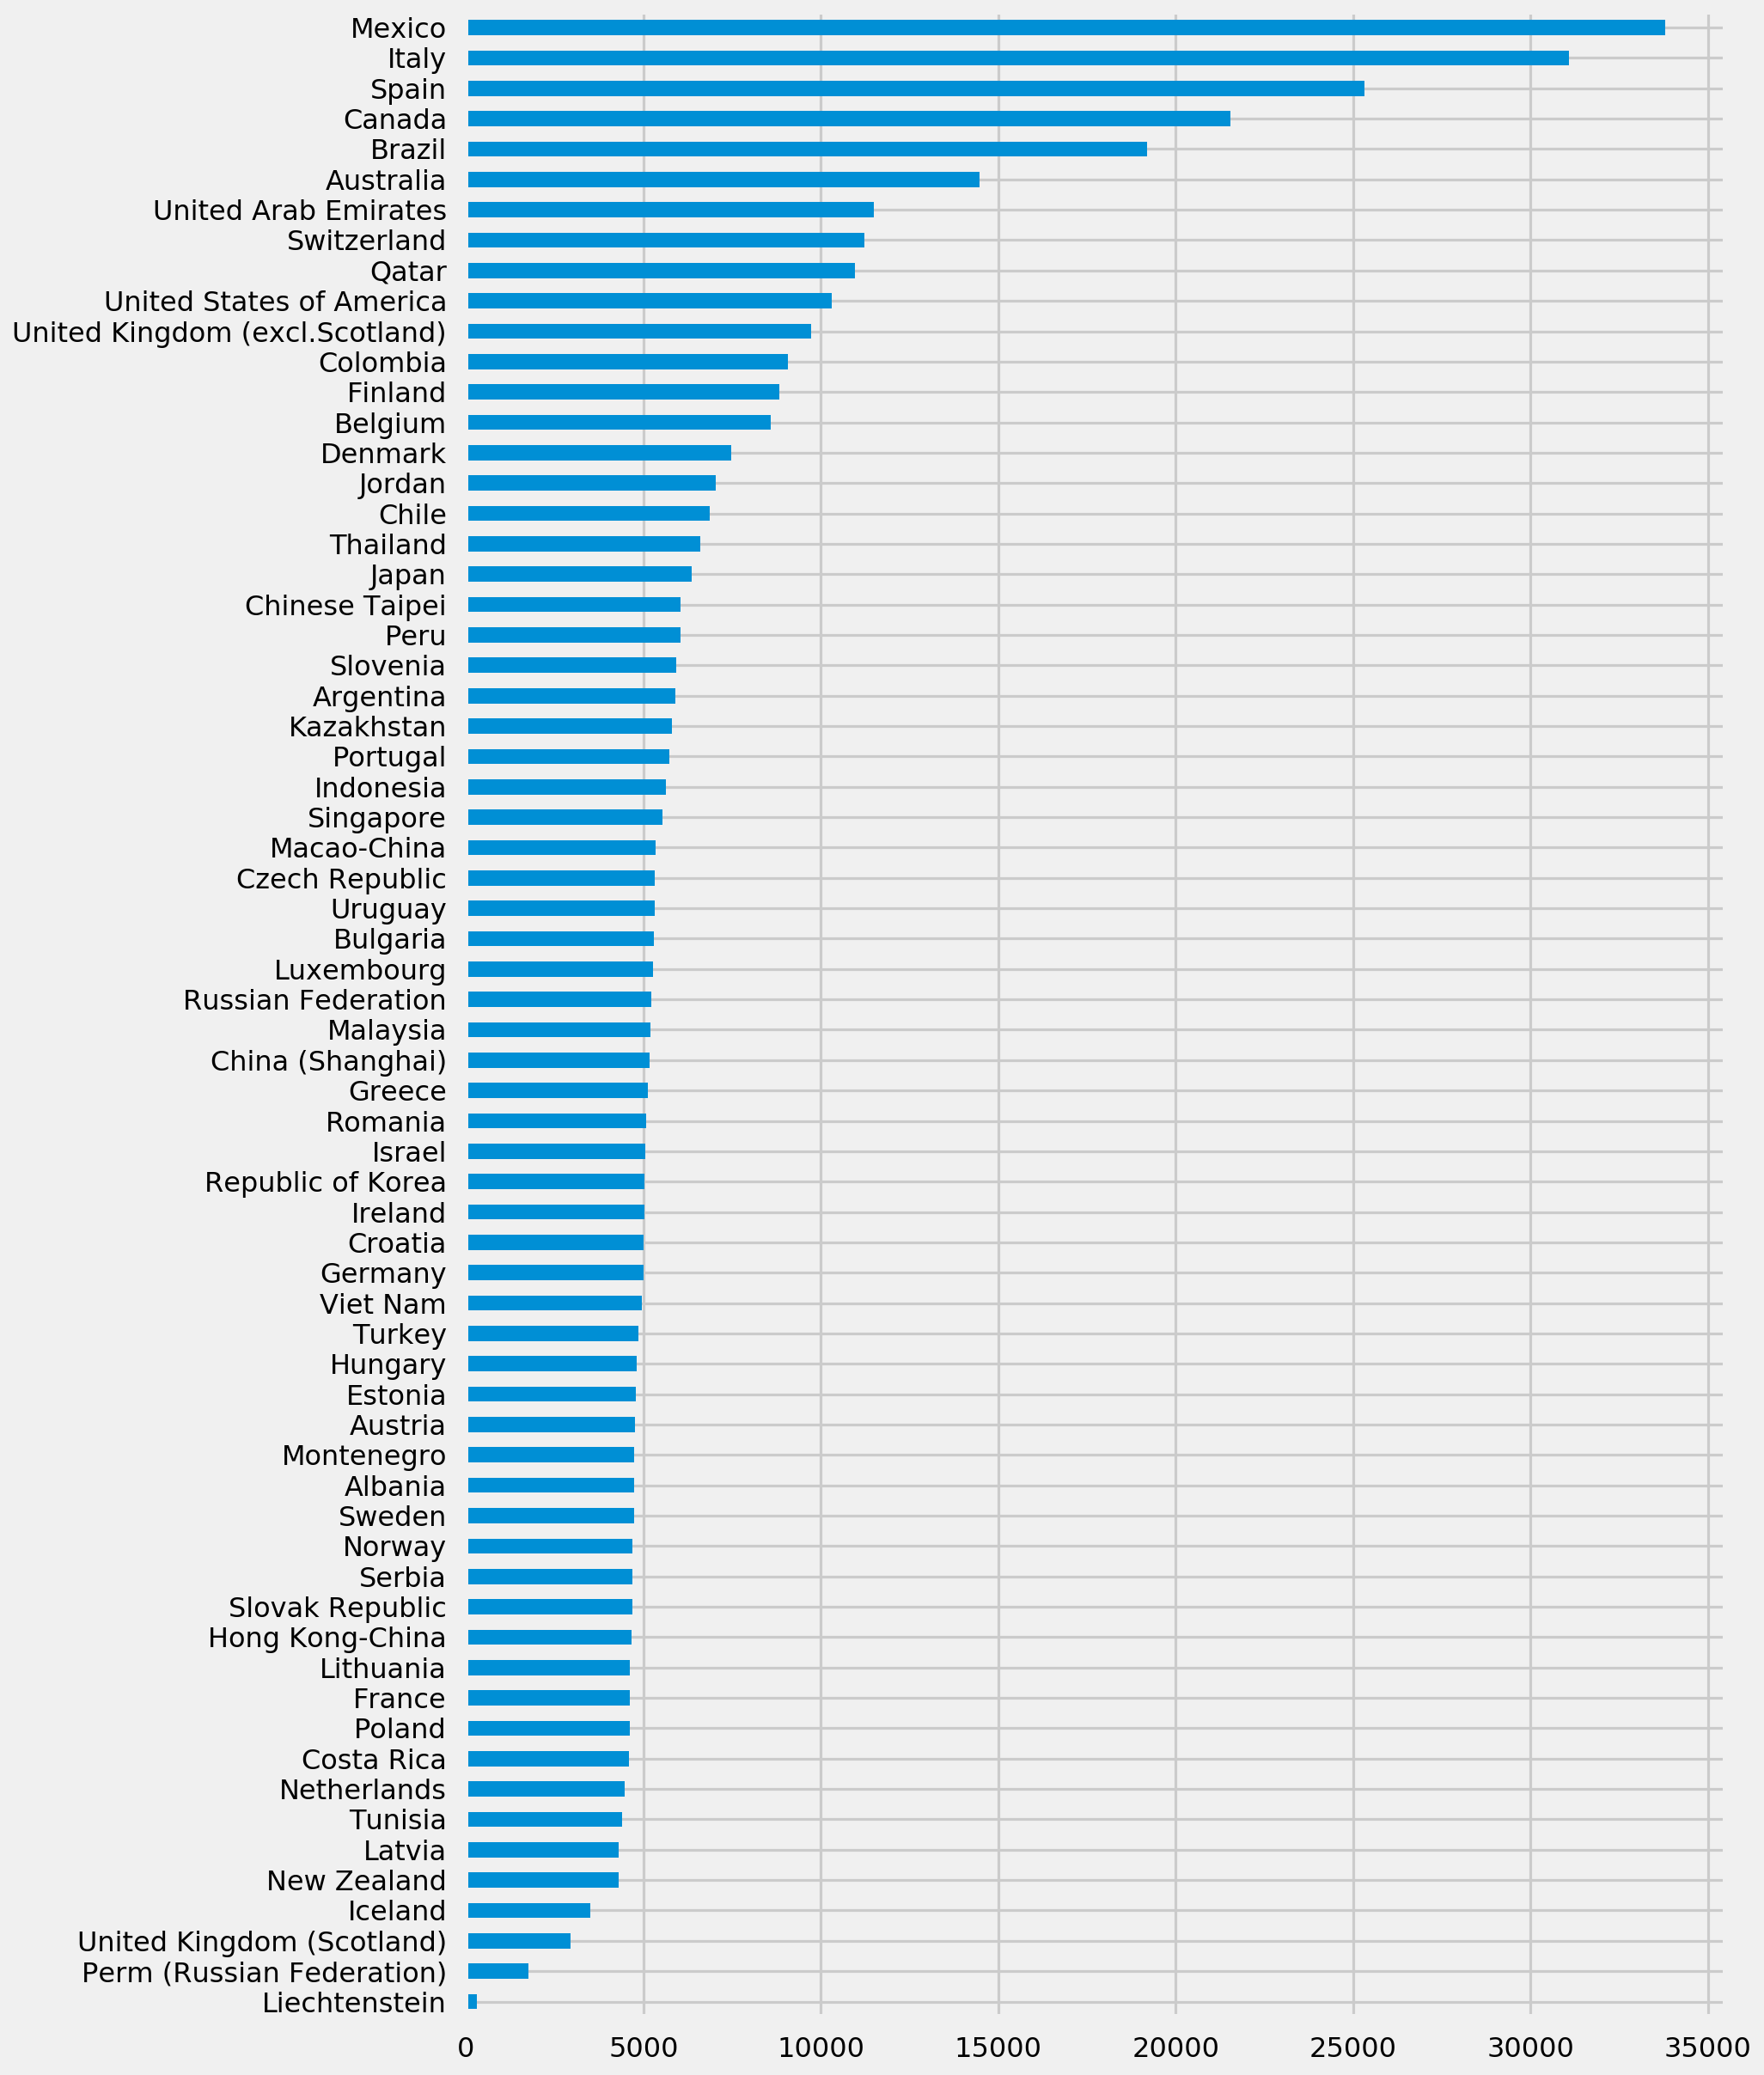

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 20)
df_clean['NC'].value_counts(ascending=True).plot(kind="barh")
plt.show()


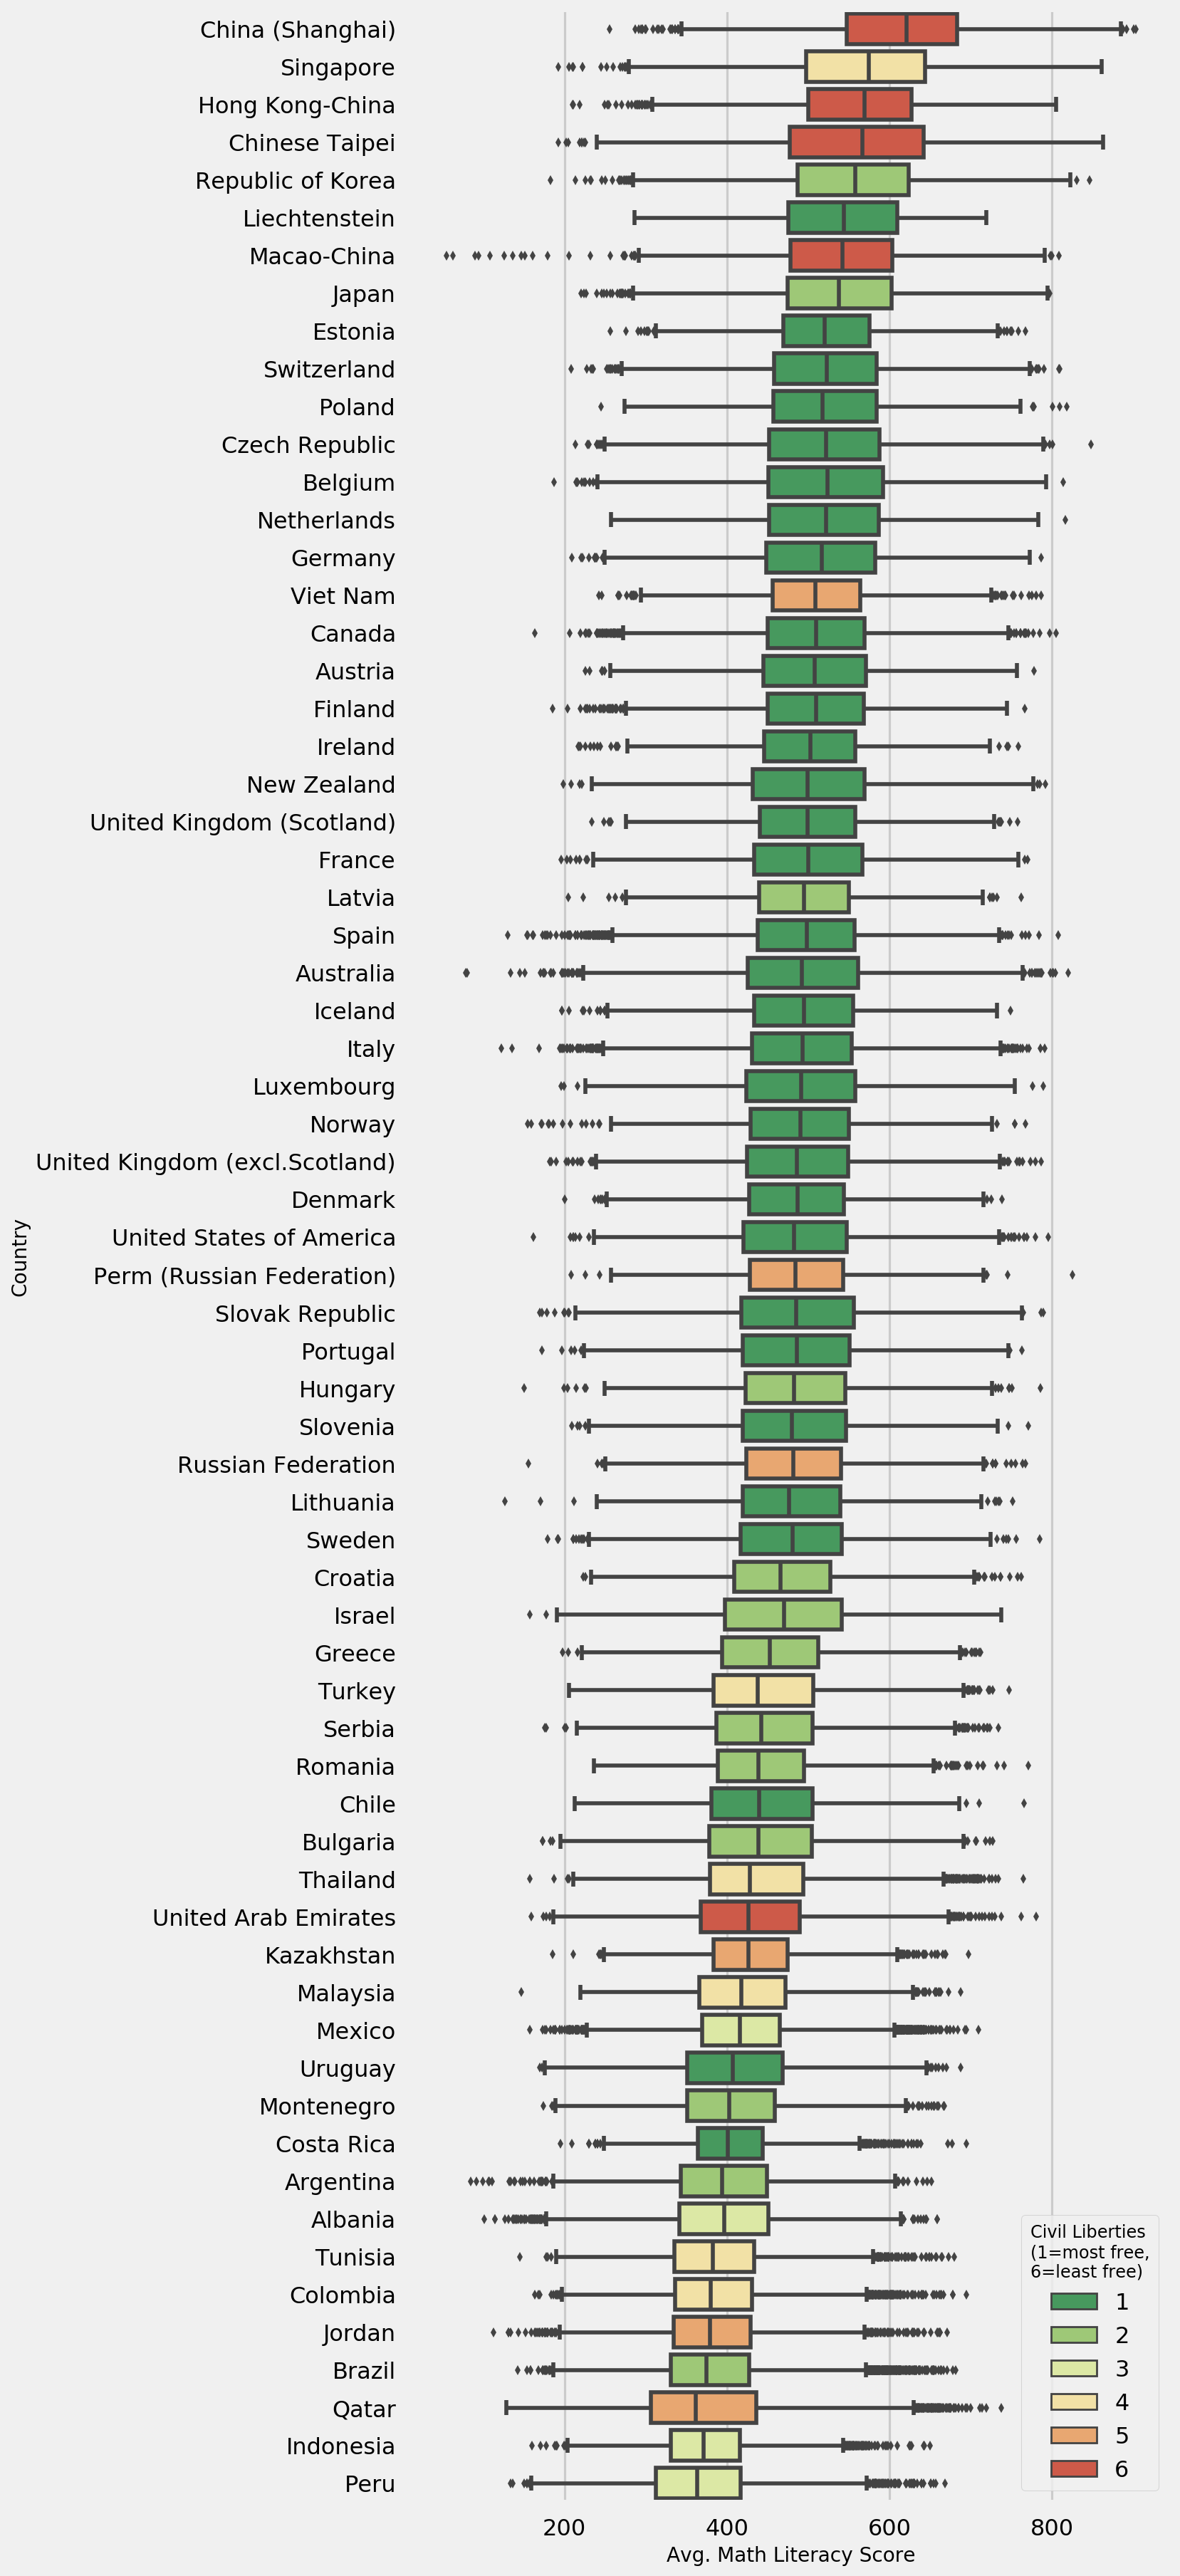

In [24]:
cnt_sort = df_clean.groupby('NC')['math_literacy'].mean().sort_values(
    ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 30)
sns.boxplot(data=df_clean,
            y='NC',
            x='math_literacy',
            order=cnt_sort.index.get_level_values('NC'),
            dodge=False,
            palette='RdYlGn_r',
            hue='civil_liberties')
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Avg. Math Literacy Score", fontsize=14)
legend = ax.legend(loc='best', title_fontsize=12).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=16)
plt.show()
fig.savefig("images/math-literacy-country.png")


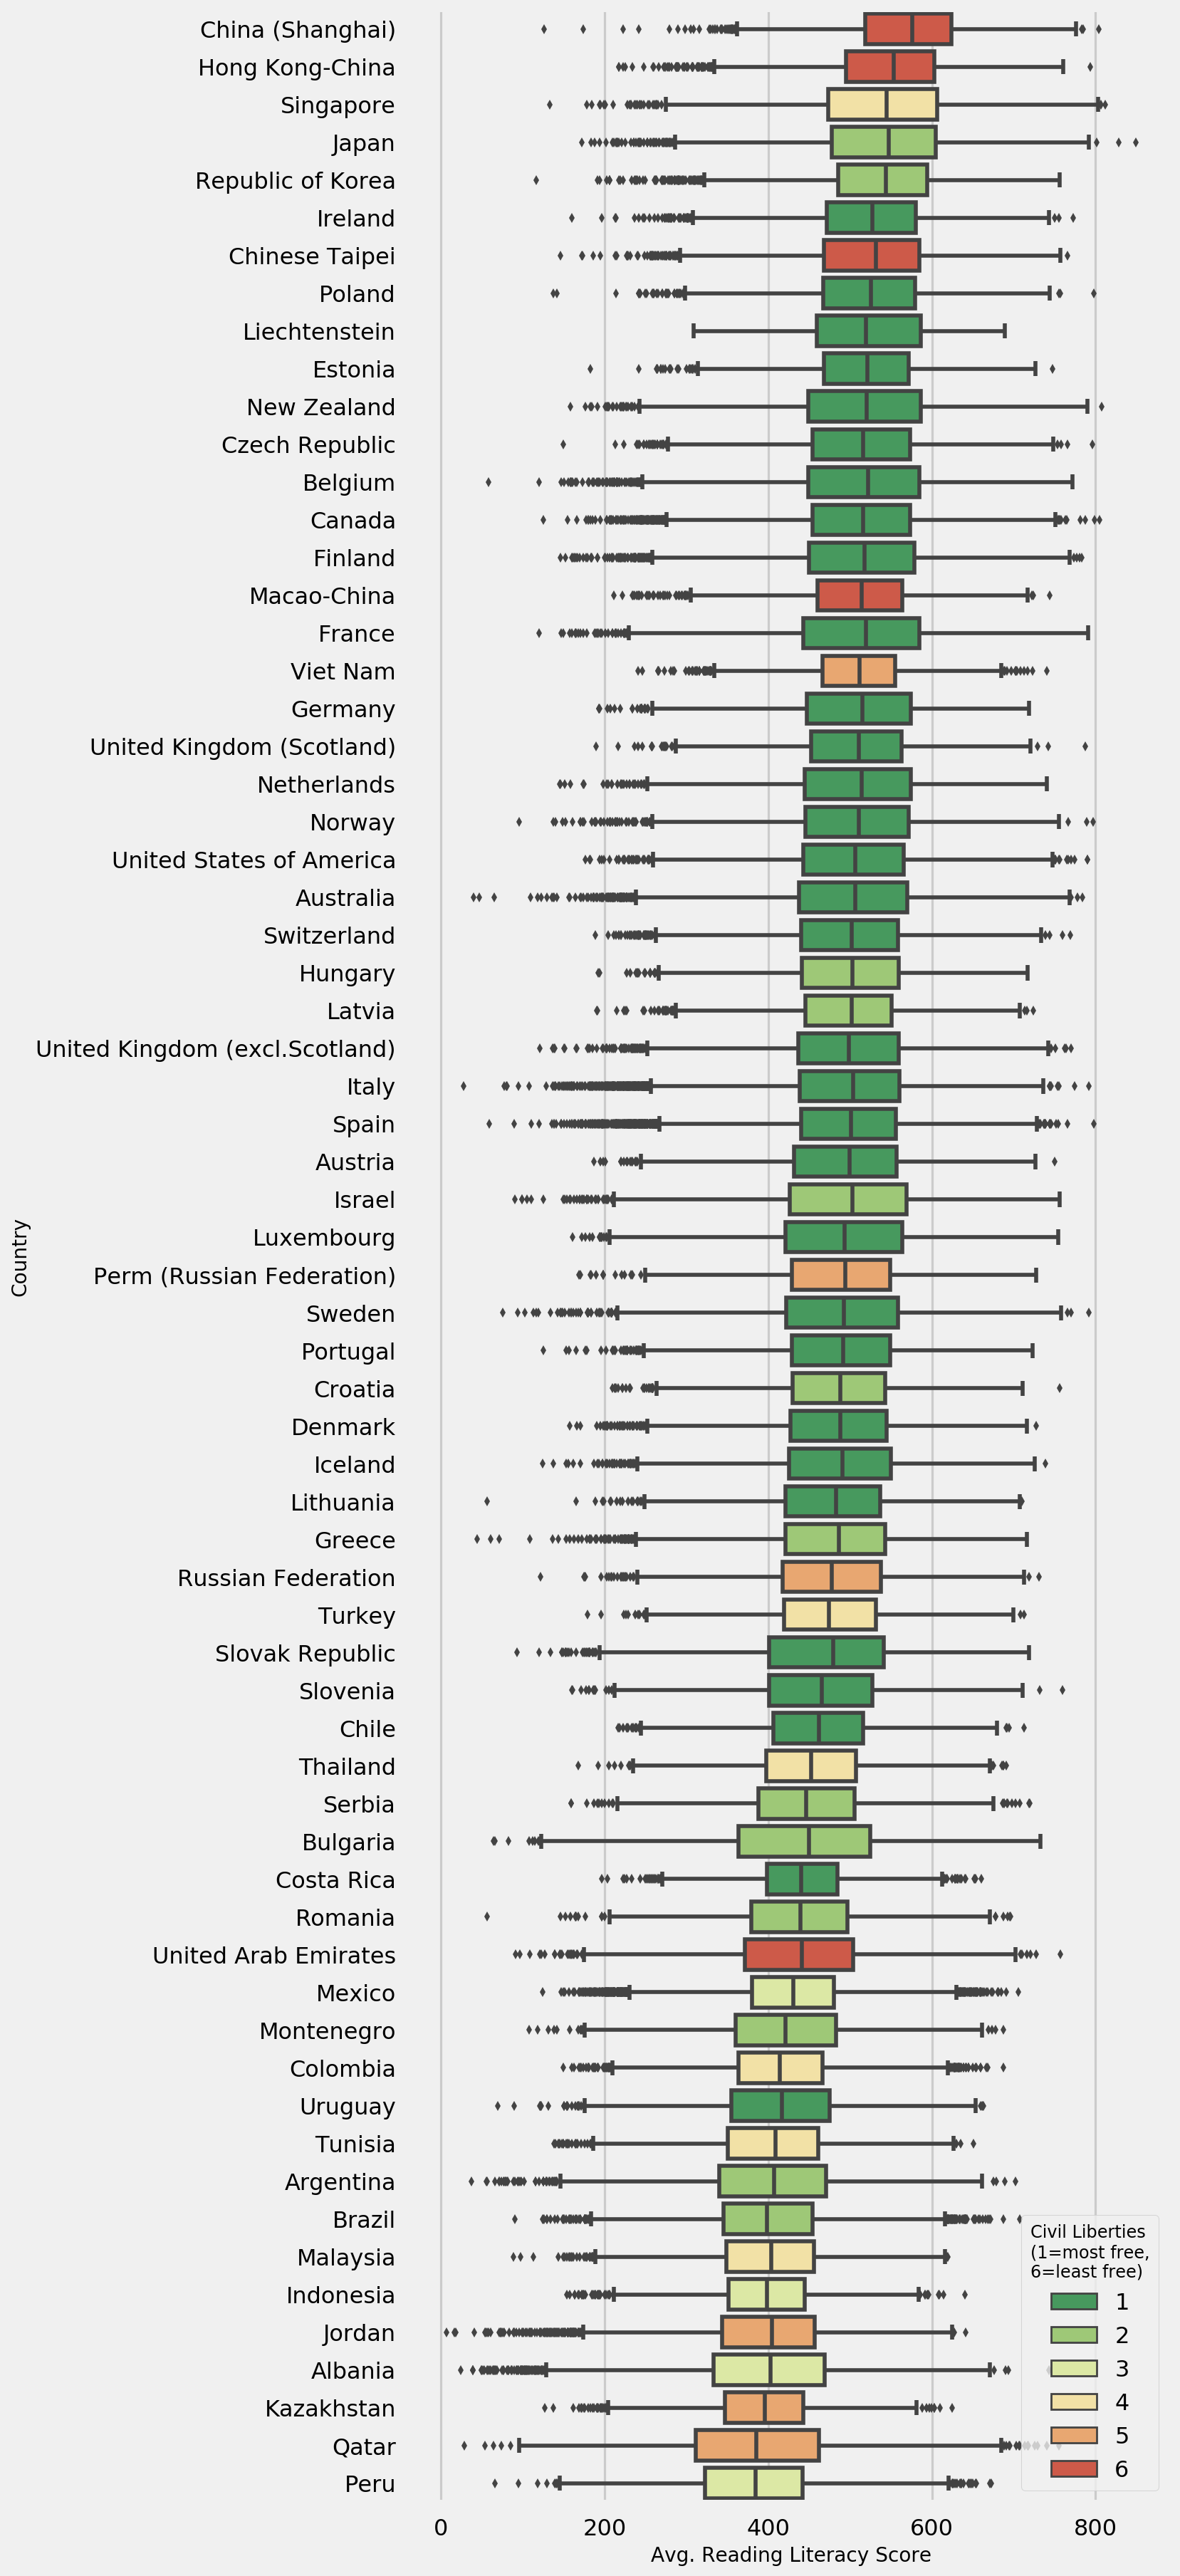

In [25]:
cnt_sort = df_clean.groupby('NC')['read_literacy'].mean().sort_values(
    ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 30)
sns.boxplot(data=df_clean,
            y='NC',
            x='read_literacy',
            order=cnt_sort.index.get_level_values('NC'),
            dodge=False,
            palette='RdYlGn_r',
            hue='civil_liberties')
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Avg. Reading Literacy Score", fontsize=14)
legend = ax.legend(loc='best', title_fontsize=12).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=16)
plt.show()

fig.savefig("images/read-literacy-country.png")

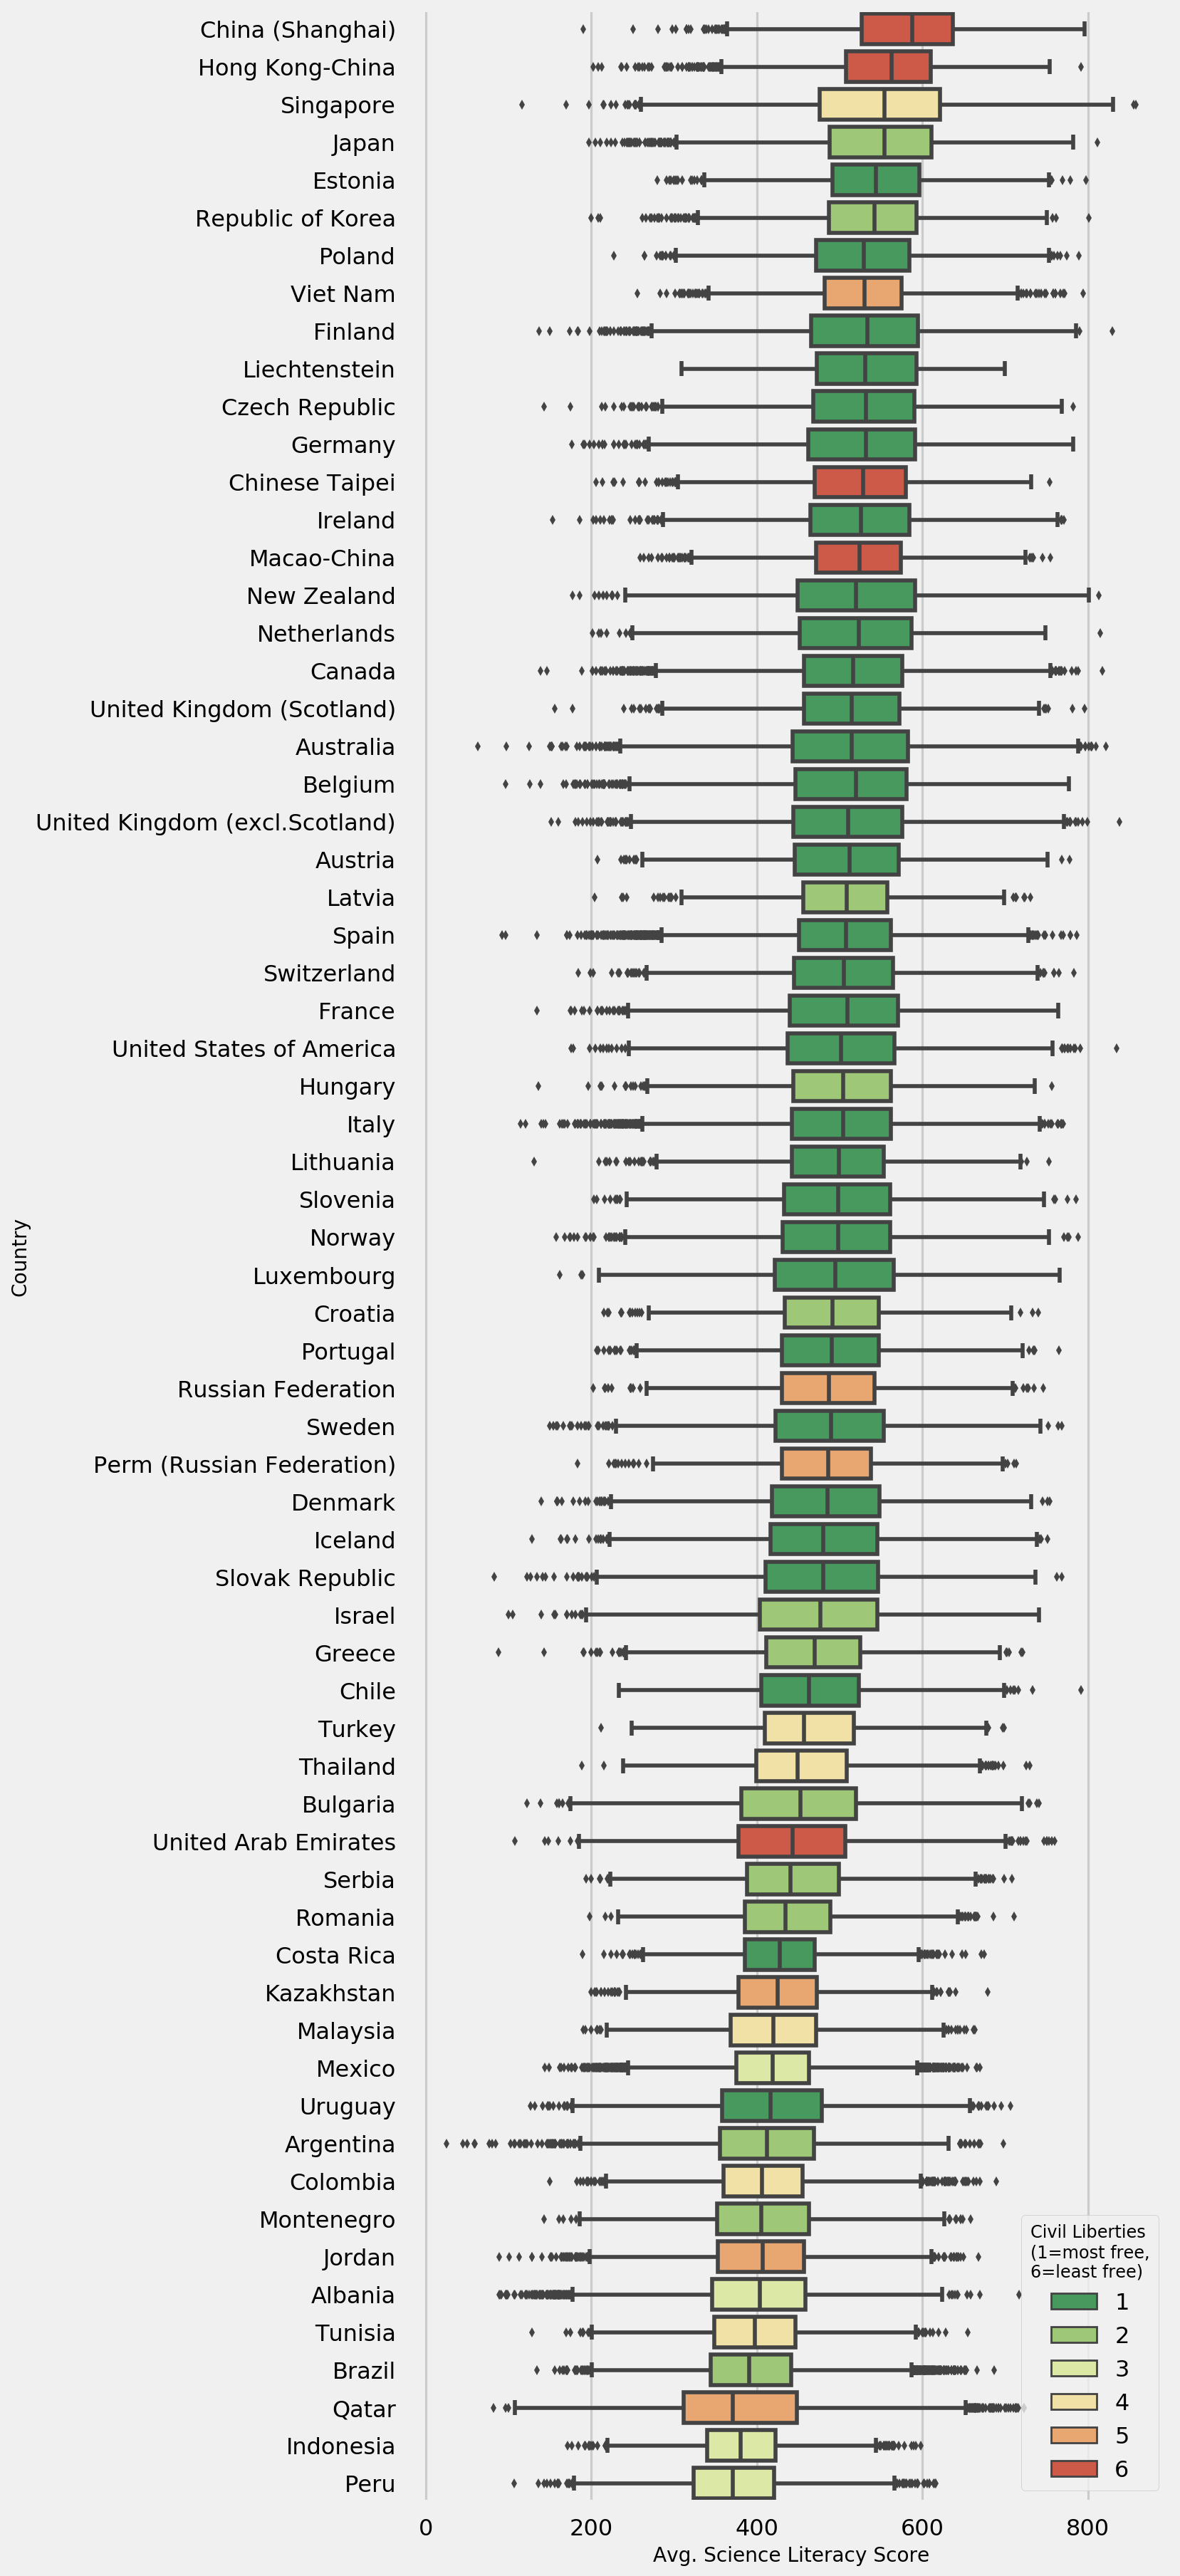

In [26]:
cnt_sort = df_clean.groupby('NC')['sci_literacy'].mean().sort_values(
    ascending=False)

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 30)
sns.boxplot(data=df_clean,
            y='NC',
            x='sci_literacy',
            order=cnt_sort.index.get_level_values('NC'),
            dodge=False,
            palette='RdYlGn_r',
            hue='civil_liberties')
ax.set_ylabel("Country", fontsize=14)
ax.set_xlabel("Avg. Science Literacy Score", fontsize=14)
legend = ax.legend(loc='best', title_fontsize=12).set_title(
    'Civil Liberties\n(1=most free,\n6=least free)')
ax.tick_params(labelsize=16)
plt.show()

fig.savefig("images/sci-literacy-country.png")


In [27]:
df_clean.ST08Q01.unique()

array(['None', 'One or two times', 'Three or four times', nan,
       'Five or more times'], dtype=object)

In [28]:
df_clean.ST115Q01.unique()

array([ 1.,  2.,  3., nan,  4.])

In [29]:
df_clean.NC.value_counts().head(20)

Mexico                            33806
Italy                             31073
Spain                             25313
Canada                            21544
Brazil                            19204
Australia                         14481
United Arab Emirates              11500
Switzerland                       11229
Qatar                             10966
United States of America          10294
United Kingdom (excl.Scotland)     9714
Colombia                           9073
Finland                            8829
Belgium                            8597
Denmark                            7481
Jordan                             7038
Chile                              6856
Thailand                           6606
Japan                              6351
Chinese Taipei                     6046
Name: NC, dtype: int64

## Quality issues

In [30]:
df_clean['EC06Q01'].unique()

[NaN, 0 to 3 years, 4 to 6 years, 10 to 12 years, 7 to 9 years, 13 years or older]
Categories (5, object): [0 to 3 years < 4 to 6 years < 7 to 9 years < 10 to 12 years < 13 years or older]

In [31]:
df_new = df_clean[[
    'ST08Q01', 'EC06Q01', 'ST04Q01', 'math_literacy', 'read_literacy', 'sci_literacy'
]]


In [32]:
rpt_dummies = pd.get_dummies(df_new['EC06Q01'])


In [33]:
df_new = df_new.join(rpt_dummies)


In [34]:
rpt_dummies = pd.get_dummies(df_new['ST04Q01'])

In [35]:
df_new = df_new.join(rpt_dummies)

In [36]:
rpt_dummies = pd.get_dummies(df_new['ST08Q01'])

In [37]:
df_new = df_new.join(rpt_dummies)

In [38]:
df_new.head()

,ST08Q01,EC06Q01,ST04Q01,math_literacy,read_literacy,sci_literacy,0 to 3 years,4 to 6 years,7 to 9 years,10 to 12 years,13 years or older,Female,Male,Five or more times,None,One or two times,Three or four times
0,None,NaN,Female,366.18634,261.01424,371.91348,0,0,0,0,0,1,0,0,1,0,0
1,One or two times,NaN,Female,470.56396,384.68832,478.12382,0,0,0,0,0,1,0,0,0,1,0
2,None,NaN,Female,505.53824,405.18154,486.60946,0,0,0,0,0,1,0,0,1,0,0
3,None,NaN,Female,449.45476,477.46376,453.97240,0,0,0,0,0,1,0,0,1,0,0
4,One or two times,NaN,Female,385.50398,256.01010,367.15778,0,0,0,0,0,1,0,0,0,1,0


In [39]:
df_new['intercept'] = 1

In [40]:
lm = sm.OLS(
    df_new['math_literacy'],
    df_new[[
        'intercept', '0 to 3 years', 
        '7 to 9 years', '10 to 12 years', '13 years or older'
    ]],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          math_literacy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     185.3
Date:                Tue, 28 May 2019   Prob (F-statistic):          5.18e-159
Time:                        11:24:56   Log-Likelihood:            -2.9281e+06
No. Observations:              485490   AIC:                         5.856e+06
Df Residuals:                  485485   BIC:                         5.856e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept           468.9203      0.149   3138.499      0.000     468.627     469.213
0 to 3 years         15.6761      0.641     24.441      0.000      14.419      16.933
7 to 9 years         -2.7948      1.847     -1.513      0.130      -6.414       0.824
10 to 12 years      -11.6015      2.824     -4.108      0.000     -17.137      -6.066
13 years or older   -38.3799      3.566    -10.763      0.000     -45.369     -31.391
==============================================================================
Omnibus:                     5171.620   Durbin-Watson:                   0.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4183.464
Skew:                           0.156   Prob(JB):                         0.00
Kurtosis:                       2.668   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
lm = sm.OLS(
    df_new['sci_literacy'],
    df_new[[
        'intercept', '0 to 3 years', '7 to 9 years',
        '10 to 12 years', '13 years or older'
    ]],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sci_literacy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     198.0
Date:                Tue, 28 May 2019   Prob (F-statistic):          5.72e-170
Time:                        11:24:57   Log-Likelihood:            -2.9144e+06
No. Observations:              485490   AIC:                         5.829e+06
Df Residuals:                  485485   BIC:                         5.829e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept           475.5041      0.145   3273.281      0.000     475.219     475.789
0 to 3 years         10.7489      0.624     17.237      0.000       9.527      11.971
7 to 9 years        -16.9450      1.795     -9.438      0.000     -20.464     -13.426
10 to 12 years      -26.7815      2.746     -9.752      0.000     -32.164     -21.399
13 years or older   -59.7497      3.467    -17.233      0.000     -66.545     -52.954
==============================================================================
Omnibus:                     3156.420   Durbin-Watson:                   0.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2194.336
Skew:                          -0.021   Prob(JB):                         0.00
Kurtosis:                       2.673   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
lm = sm.OLS(
    df_new['read_literacy'],
    df_new[[
        'intercept', '0 to 3 years', '7 to 9 years',
        '10 to 12 years', '13 years or older'
    ]],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          read_literacy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     207.3
Date:                Tue, 28 May 2019   Prob (F-statistic):          5.59e-178
Time:                        11:24:57   Log-Likelihood:            -2.9187e+06
No. Observations:              485490   AIC:                         5.837e+06
Df Residuals:                  485485   BIC:                         5.837e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept           471.8513      0.147   3219.845      0.000     471.564     472.138
0 to 3 years          8.6990      0.629     13.828      0.000       7.466       9.932
7 to 9 years        -19.1243      1.811    -10.559      0.000     -22.674     -15.574
10 to 12 years      -29.9574      2.770    -10.814      0.000     -35.387     -24.528
13 years or older   -69.7662      3.498    -19.947      0.000     -76.621     -62.911
==============================================================================
Omnibus:                     3823.934   Durbin-Watson:                   0.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3824.804
Skew:                          -0.205   Prob(JB):                         0.00
Kurtosis:                       2.856   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
lm = sm.OLS(
    df_new['math_literacy'],
    df_new[[
        'intercept', 'One or two times', 'Three or four times',
        'Five or more times'
    ]],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          math_literacy   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     4262.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:57   Log-Likelihood:            -2.9221e+06
No. Observations:              485490   AIC:                         5.844e+06
Df Residuals:                  485486   BIC:                         5.844e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
intercept             480.9815      0.178   2702.294      0.000     480.633     481.330
One or two times      -26.8135      0.334    -80.389      0.000     -27.467     -26.160
Three or four times   -38.0909      0.603    -63.168      0.000     -39.273     -36.909
Five or more times    -54.5473      0.746    -73.162      0.000     -56.009     -53.086
==============================================================================
Omnibus:                     4201.256   Durbin-Watson:                   0.924
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3445.657
Skew:                           0.139   Prob(JB):                         0.00
Kurtosis:                       2.694   Cond. No.                         5.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Make a new column for any child who began education after 10 years
df_new['10 years or older'] = df_new['10 to 12 years'] + df_new['13 years or older']

In [45]:
lm = sm.OLS(
    df_new['math_literacy'],
    df_new[[
        'intercept', 'Female', 'Male', '10 years or older'
    ]],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          math_literacy   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     818.5
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:57   Log-Likelihood:            -2.9276e+06
No. Observations:              485490   AIC:                         5.855e+06
Df Residuals:                  485487   BIC:                         5.855e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept           313.2028      0.096   3246.262      0.000     313.014     313.392
Female              150.9498      0.152    994.359      0.000     150.652     151.247
Male                162.2530      0.153   1062.506      0.000     161.954     162.552
10 years or older   -23.1723      2.214    -10.466      0.000     -27.512     -18.833
==============================================================================
Omnibus:                     4826.216   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3844.899
Skew:                           0.142   Prob(JB):                         0.00
Kurtosis:                       2.670   Cond. No.                     5.77e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [46]:
lm = sm.OLS(
    df_new['read_literacy'],
    df_new[[
        'intercept', 'Female', 'Male', '10 years or older'
    ]],
)
results = lm.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          read_literacy   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     8433.
Date:                Tue, 28 May 2019   Prob (F-statistic):               0.00
Time:                        11:24:57   Log-Likelihood:            -2.9108e+06
No. Observations:              485490   AIC:                         5.822e+06
Df Residuals:                  485487   BIC:                         5.822e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept           314.6837      0.093   3376.636      0.000     314.501     314.866
Female              175.2112      0.147   1194.881      0.000     174.924     175.499
Male                139.4725      0.148    945.538      0.000     139.183     139.762
10 years or older   -44.2960      2.139    -20.712      0.000     -48.488     -40.104
==============================================================================
Omnibus:                     2847.048   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2775.689
Skew:                          -0.166   Prob(JB):                         0.00
Kurtosis:                       2.837   Cond. No.                     5.77e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.19e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [47]:
df_clean['EC06Q01'].value_counts(normalize=True) * 100

0 to 3 years         64.617673
4 to 6 years         22.820672
7 to 9 years          7.420994
10 to 12 years        3.160243
13 years or older     1.980419
Name: EC06Q01, dtype: float64

In [48]:
df_clean['ST26Q01'].value_counts(normalize=True) * 100

Yes    88.575692
No     11.424308
Name: ST26Q01, dtype: float64

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!